<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_IBurrington/blob/main/HW7/IB_HW7_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook setup and packages installation

In [ ]:
pip install george

In [ ]:
pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.preprocessing import scale
import os
import george
from george import kernels
from scipy.optimize import minimize
pl.style.use('seaborn')
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# cd /content/gdrive/MyDrive

In [ ]:
# envs = json.load(open(".kaggle/kagglekey.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
#cd /content/gdrive/MyDrive/MLTSA22/

In [ ]:
#mkdir PLAsTiCC2018

In [ ]:
cd /content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018/

/content/gdrive/MyDrive/MLTSA22/PLAsTiCC2018


# TASK I :  Data Acquisition

In [ ]:
# !kaggle competitions download -c PLAsTiCC-2018 --file 'training_set.csv'

In [ ]:
# !kaggle competitions download -c PLAsTiCC-2018 --file 'training_set_metadata.csv'

In [ ]:
# !unzip training_set.csv.zip

In [ ]:
lcvs = pd.read_csv('training_set.csv')

In [ ]:
lcvs.head() 

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


In [ ]:
lcvs.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


In [ ]:
print("The shape of light curves dataset is:", lcvs.shape)

The shape of light curves dataset is: (1421705, 6)


In [ ]:
#check missing values
lcvs.isna().sum()

object_id    0
mjd          0
passband     0
flux         0
flux_err     0
detected     0
dtype: int64

Read the Kaggle challenge for a description of the data . This "Starter Kit" which includes a notebook (written by y good friend Gautham Narayan) may be especially useful
https://www.kaggle.com/michaelapers/the-plasticc-astronomy-starter-kit

In [ ]:
#converting julian calendar to datetime just to feel something and also I wanted to understand just how tiny these timescales are
lcvs['date'] = pd.to_datetime((lcvs['mjd'] - 40587 ) * 86400)

In [ ]:
lcvs.head()

,object_id,mjd,passband,flux,flux_err,detected,date
0,615,59750.4229,2,-544.810303,3.622952,1,1970-01-01 00:00:01.655719738
1,615,59750.4306,1,-816.434326,5.553370,1,1970-01-01 00:00:01.655720403
2,615,59750.4383,3,-471.385529,3.801213,1,1970-01-01 00:00:01.655721069
3,615,59750.4450,4,-388.984985,11.395031,1,1970-01-01 00:00:01.655721648
4,615,59752.4070,2,-681.858887,4.041204,1,1970-01-01 00:00:01.655891164


For each object there are 6 time series in 6 different passbands 

In [ ]:
bands = lcvs["passband"].unique()
print("Passbands (filter) identifiers:", bands)

Passbands (filter) identifiers: [2 1 3 4 5 0]


In [ ]:
objects = lcvs["object_id"].unique()
print("There are {} astrophysical simulated objects in my dataset".format(objects.shape[0]))

There are 7848 astrophysical simulated objects in my dataset


In [ ]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [ ]:
print("The metadata columns are: ", metadata.columns)

The metadata columns are:  Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')


In [ ]:
targets = metadata['target'].unique()
print("There are {0} classification categories (types of astronomical events) for our lightcurves.".format(len(targets)))

There are 14 classification categories (types of astronomical events) for our lightcurves.


In [ ]:
print("The metadata dataset contains features: ", metadata.shape[1])

The metadata dataset contains features:  12


# TASK II : data exploration and visualization 





In [ ]:
# dict of passband names for legibility, colormap for passbands
colors = plt.cm.viridis(np.linspace(0, 1, len(bands)))
passband_key = {0:"u", 1:"g", 2:"r", 3:"i", 4:"z", 5:"y" }

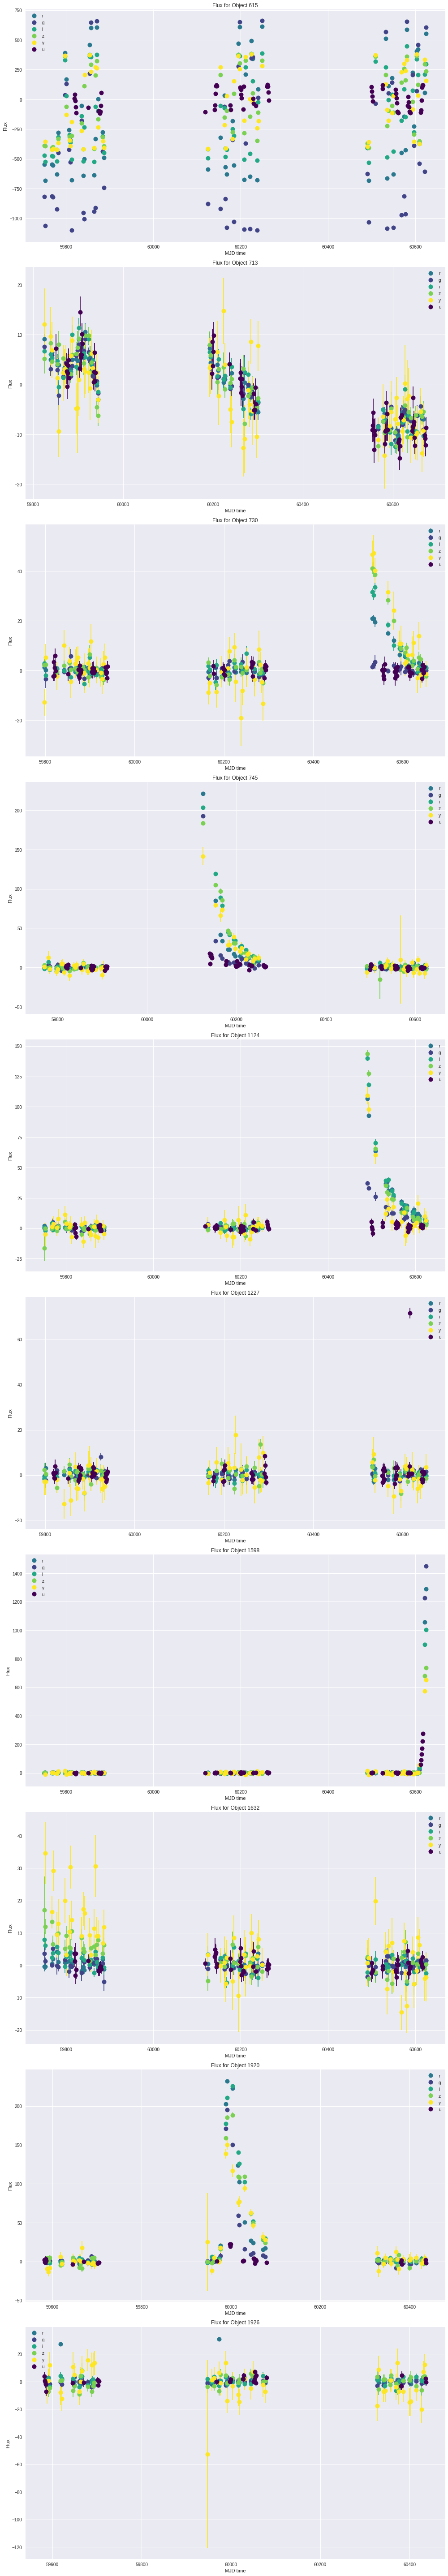

In [ ]:
fig, ax = pl.subplots(10, 1, figsize=(14, 80))
tenobj = objects[0:10]


for index, obj in enumerate(tenobj): 
  objdf = lcvs[lcvs['object_id'] == obj]
  ax[index].title.set_text('Flux for Object {0}'.format(obj))
  passbands = objdf['passband'].unique()
  for band in bands:
    band_df = objdf[objdf['passband'] == band]
    ax[index].errorbar(band_df['mjd'], band_df['flux'], yerr=band_df['flux_err'], fmt='o', color=colors[band], label=passband_key[band], ms=10)
    # band_df.plot('mjd', 'flux', color=colors[band], alpha=0.2, label=passband_key[band], ax=ax[index])
    ax[index].set_xlabel('MJD time')
    ax[index].set_ylabel('Flux')
    ax[index].legend()
fig.tight_layout()

Fig. 1: Plots of the first ten lightcurves in the PLAsTiCC dataset, plotted by passband with error bars. The shapes of these lightcurves and distances between passband values vary pretty widely here.

<font color="red">FBB ok</font>


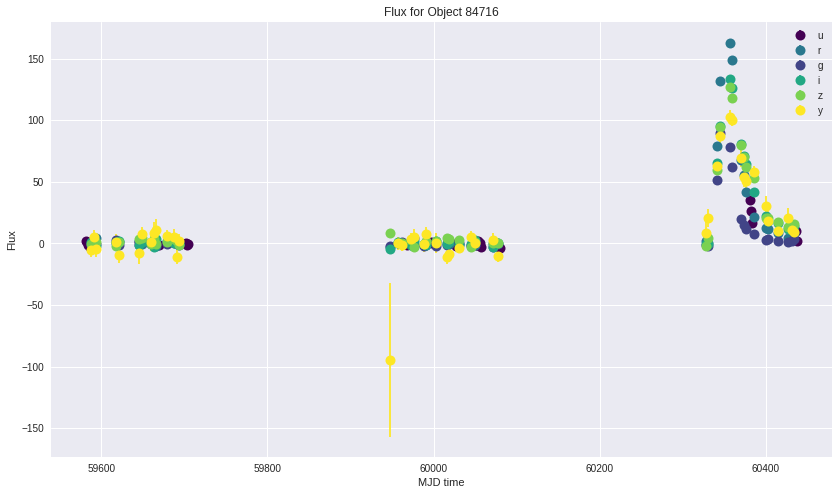

In [ ]:
fig, ax = pl.subplots(figsize=(14, 8))

objdf = lcvs[lcvs['object_id'] == 84716]
ax.title.set_text('Flux for Object 84716')
passbands = objdf['passband'].unique()
for band in passbands:
  band_df = objdf[objdf['passband'] == band]
  ax.errorbar(band_df['mjd'], band_df['flux'], yerr=band_df['flux_err'], fmt='o', color=colors[band], label=passband_key[band], ms=10)
  # band_df.plot('mjd', 'flux', color=colors[band], alpha=0.5, label=passband_key[band], ax=ax)
  ax.legend()
  ax.set_xlabel('MJD time')
  ax.set_ylabel('Flux')

Fig 2.: Plot of lightcurve 84716 in the PLAsTiCC dataset. Comparing to our 10 lightcurves in Figure 1, this plot seems similar to objects 1124. Checkning our metadata, these lightcuves apparently have the same target, maybe this is relevant?

<font color="red"> FBB what I wanted was for you to note that there is an outlier, a negative flux point, with a large uncertainty. that should warn you agains using min and max wihtout associating them to uncertainty as extracted features</font>


# TASK III: Extract features


describe each feature you plan to extract. Briefly indicate why you think it is a valuable feature and what data type is it (e.g. continuous, binary, categorical, if continuous does it have a max or min value or is it unbound?)

        

## Standardizing lightcurve in separate dataframe just in case

In [ ]:
lcvs_s = lcvs.copy()

In [ ]:
lcvs_s['err_pct'] = lcvs_s['flux_err'] / np.abs(lcvs_s['flux'])

In [ ]:
lcvs_s['err_pct'].min(), lcvs_s['err_pct'].max() 

(0.0046498560382961275, 585288.0)

OK but some error ranges are...58,000 percent?

In [ ]:
lcvs_s['flux'] = (lcvs_s['flux'] - lcvs_s['flux'].mean()) / lcvs_s['flux'].std()

In [ ]:
#check if you did it right
print("Mean:", lcvs_s['flux'].mean())
print("Standard Deviation:", lcvs_s['flux'].std())

Mean: -1.7665177206043653e-17
Standard Deviation: 1.0000000000000002


In [ ]:
# Fed: "so think about the errors in percentage" this seems like too literal an interpretation and also it's still not quite right 
# but I feel like just subtracting flux.mean/std doesn't make sense either? like that doesn't actually "scale" it as a percentage of flux
lcvs_s['flux_err'] =  np.abs(lcvs_s['flux']) * lcvs_s['err_pct']

This seems like, really bad?

In [ ]:
lcvs_s['flux_err'].min(), lcvs_s['flux_err'].max() 

(3.920439756000103e-09, 3921.8057968823773)

But also even the standardized objects have some wild outliers....

In [ ]:
lcvs_s['flux'].min(), lcvs_s['flux'].max() 

(-311.9585287947723, 660.2741527394246)

-4.47732 10.567667 2.3602661860219953
-0.007915816249078871 0.018683433427464324 2.3602661860219953


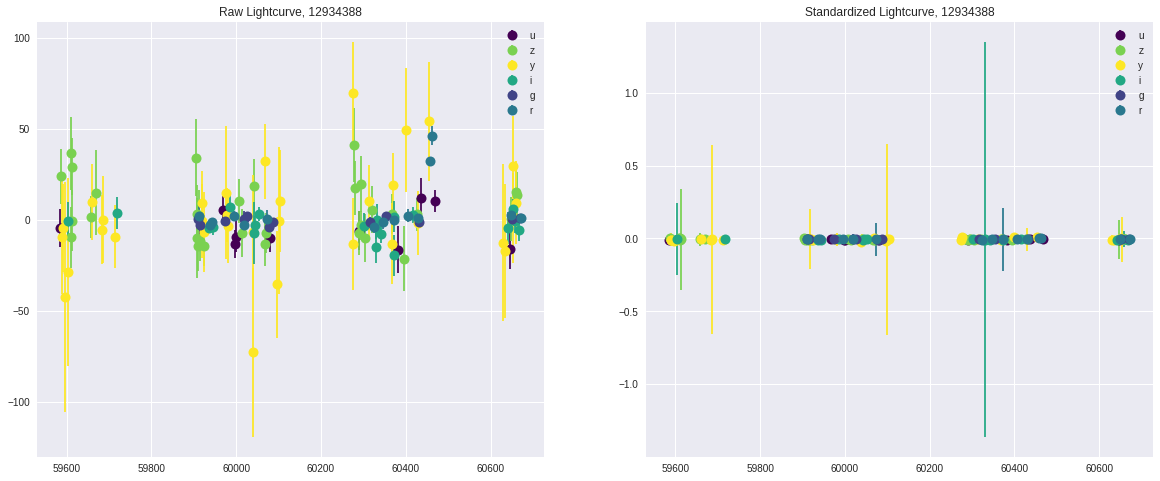

In [ ]:
fig, ax = pl.subplots(1,2, figsize=(20, 8))

n = np.random.choice(lcvs['object_id'].unique())

objdf = lcvs[lcvs['object_id'] == n]
print(objdf.iloc[0].flux, objdf.iloc[0].flux_err, objdf.iloc[0].flux_err / np.abs(objdf.iloc[0].flux))
passbands = objdf['passband'].unique()
ax[0].set_title("Raw Lightcurve, {0}".format(n))
for band in passbands:
  band_df = objdf[objdf['passband'] == band]
  
  ax[0].errorbar(band_df['mjd'], band_df['flux'], yerr=band_df['flux_err'], fmt='o', color=colors[band], label=passband_key[band], ms=10)
  # band_df.plot('mjd', 'flux', color=colors[band], alpha=0.2, label=passband_key[band], ax=ax[0])
  ax[0].legend()

objdf_s = lcvs_s[lcvs_s['object_id'] == n]
print(objdf_s.iloc[0].flux, objdf_s.iloc[0].flux_err, (objdf_s.iloc[0].flux_err / np.abs(objdf_s.iloc[0].flux)))
passbands = objdf_s['passband'].unique()
ax[1].set_title("Standardized Lightcurve, {0}".format(n))
for band in passbands:
  band_df = objdf_s[objdf_s['passband'] == band]
  ax[1].errorbar(band_df['mjd'], band_df['flux'], yerr=band_df['flux_err'], fmt='o', color=colors[band], label=passband_key[band], ms=10)
  # band_df.plot('mjd', 'flux', color=colors[band], alpha=0.5, label=passband_key[band], ax=ax[1])
  ax[1].legend()

Fig. 3: a plot set up to compare randomly selected raw and standardized lightcurves to verify if standardized error values are consistent. Maybe the ratios wouldn't be so bananas if I hadn't worked from the absolute values of flux, but not doing that also seemed ill-advised? Just scaling the error down looks better visually but I don't trust it. 

<font color="red">FBB ok</font>


# Feature extraction (raw and standardized)

Features extracted: 
- from raw:
  - mean, raw value (because seems like a baseline useful thing for a dataset)
  - standard deviation, raw value (which can help me know if my mean isn't great)
  - min and max (with errors), raw value 
  - skew (because if we're doing this feature extraction to create a classifier and it seems like our astronomical events have consistent-ish shaped plots, they probably have reasonably consistent skews which might make skew an OK parameter for predicting astronomical event)

- from standardized:
  - standardized median (because of Fed's comment that standardized median provides 'the location of the "center of mass" of the data'
  - standardized min and max (with errors) (mostly because Fed said to include it) 

- from metadata:
  - 'decl' (some piece of location data seems like a good possible vector for classification or a thing to classify)
  - 'hostgal_photoz' (redshift seems like it might be a good feature for a classifier in that maybe certain astro events have specific redshift?)
  -'hostgal_photoz_err' (but also photometric redshift isn't as accurate? so probably should inclue the error) 
  - target (because this seems like the kind of information a physicist might want to predict if they were training a classifer)


In [ ]:
# function for applying groupbys
# this method is a little bit slower than running a bunch of groupby cells but easier to keep track of methods applied 
def features_df_agg(df, lam, name):
  newdf = df.groupby(["object_id", "passband"])[["flux"]].agg(lam)
  newdf.rename(columns={'flux': name}, inplace=True)
  return newdf

def features_df_app(df, lam, name):
  newdf = df.groupby(["object_id", "passband"])[["flux"]].apply(lam)
  newdf.rename(columns={'flux': name}, inplace=True)
  return newdf
  
# function for merging
def mergeon(df1, df2): 
  return df1.merge(df2, left_index=True, right_index=True)

In [ ]:
# get min and max with error, raw data--probably could have done this with features_df but wasn't sure how to do the error merge

min = lcvs.groupby(["object_id", "passband"])[["flux"]].min().reset_index()

# on the off chance any max values are duplicates, also match by id
merge = pd.merge(min,lcvs[['flux','flux_err','object_id']],on=['flux', "object_id"])
merge.rename(columns={"flux": "min", 'flux_err': 'min_err'}, inplace=True)
merge = merge.groupby(["object_id", "passband"]).min()
merge

max = lcvs.groupby(["object_id", "passband"])[["flux"]].max().reset_index()

merge2 = pd.merge(max,lcvs[['flux','flux_err','object_id']],on=['flux', "object_id"])
merge2.rename(columns={"flux": "max", 'flux_err': 'max_err'}, inplace=True)
merge2 = merge2.groupby(["object_id", "passband"]).max()

features = mergeon(merge, merge2)

In [ ]:
# do the same for standardized values
min = lcvs_s.groupby(["object_id", "passband"])[["flux"]].min().reset_index()

merge = pd.merge(min,lcvs_s[['flux','flux_err','object_id']],on=['flux', "object_id"])
merge.rename(columns={"flux": "s_min", 'flux_err': 's_min_err'}, inplace=True)
merge = merge.groupby(["object_id", "passband"]).min()
merge

max = lcvs_s.groupby(["object_id", "passband"])[["flux"]].max().reset_index()

merge2 = pd.merge(max,lcvs_s[['flux','flux_err','object_id']],on=['flux', "object_id"])
merge2.rename(columns={"flux": "s_max", 'flux_err': 's_max_err'}, inplace=True)
merge2 = merge2.groupby(["object_id", "passband"]).max()

mergestd = mergeon(merge, merge2)

features = mergeon(features, mergestd)

In [ ]:
# I know you said for loops would be too slow but what about for loops on groupby (kind of slow but not as slow as I expected?)

extracts  = [
    features_df_agg(lcvs, (lambda x: x.std()), "std"), # standard deviation 
    features_df_agg(lcvs, (lambda x: x.mean()), "mean"), # mean 
    features_df_app(lcvs_s, (lambda x: x.skew()), "skew"), # skewness
    features_df_app(lcvs_s, (lambda x: x.median()), "s_median") # standardized median
]

for ext in extracts: 
  features = mergeon(features, ext)


features.head()

min   min_err         max   max_err     s_min  \
object_id passband                                                          
615       0         -116.913223  3.097836  125.182808  3.909554 -0.038432   
          1        -1100.440063  6.709106  660.626343  4.961018 -0.305368   
          2         -681.858887  4.041204  611.984558  3.908728 -0.191762   
          3         -530.644592  3.672556  445.737061  3.952905 -0.150721   
          4         -422.184509  4.089213  381.953735  3.885009 -0.121284   

                    s_min_err     s_max  s_max_err         std        mean  \
object_id passband                                                           
615       0          0.032572  0.027275  -0.032914   83.944735   -3.254554   
          1          0.300488  0.172598  -0.177952  601.787302 -385.699911   
          2          0.186158  0.159396  -0.165036  455.121346 -134.146566   
          3          0.145017  0.114275  -0.119903  335.425053 -121.103501   
          4          0.115694  0.096964  -0.102610  291.803449  -55.954592   

                        skew  s_median  
object_id passband                      
615       0         0.128917 -0.009419  
          1         0.415580 -0.139163  
          2         0.339918 -0.078810  
          3         0.293128 -0.050715  
          4         0.200096 -0.034802

In [ ]:
currfeat = features.columns

In [ ]:
metadata = metadata.set_index('object_id')
cols = ['decl','hostgal_photoz','hostgal_photoz_err','target']

merge_metadata = metadata[cols]

features = mergeon(features.unstack(1), merge_metadata)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  validate=validate,


In [ ]:
features.head()

,"(min, 0)","(min, 1)","(min, 2)","(min, 3)","(min, 4)","(min, 5)","(min_err, 0)","(min_err, 1)","(min_err, 2)","(min_err, 3)",...,"(s_median, 0)","(s_median, 1)","(s_median, 2)","(s_median, 3)","(s_median, 4)","(s_median, 5)",decl,hostgal_photoz,hostgal_photoz_err,target
object_id,,,,,,,,,,,,,,,,,,,,,
615,-116.913223,-1100.440063,-681.858887,-530.644592,-422.184509,-422.815094,3.097836,6.709106,4.041204,3.672556,...,-0.009419,-0.139163,-0.078810,-0.050715,-0.034802,-0.029913,-61.943836,0.0000,0.0000,92
713,-14.735178,-11.715749,-10.067919,-12.394593,-12.286801,-14.211164,2.326417,0.823976,0.717739,1.305202,...,-0.007541,-0.006853,-0.006733,-0.006721,-0.006916,-0.007369,-27.784405,1.6267,0.2552,88
730,-3.459960,-3.393080,-2.848838,-5.435799,-5.836310,-19.159811,2.511074,3.564052,1.924783,2.359130,...,-0.006694,-0.006654,-0.006567,-0.006521,-0.006428,-0.006011,-6.579593,0.2262,0.0157,42
745,-3.874349,-3.618410,-2.159753,-4.944036,-15.494463,-10.249387,1.722069,1.775791,0.886318,1.682349,...,-0.006414,-0.006460,-0.006585,-0.006331,-0.006356,-0.005954,-45.586655,0.2813,1.1523,90
1124,-6.804703,-2.622109,-2.084535,-2.800270,-16.543753,-10.860540,3.029140,2.528914,1.200008,1.923729,...,-0.006543,-0.006387,-0.006459,-0.006425,-0.006227,-0.006165,-63.823658,0.2415,0.0176,90


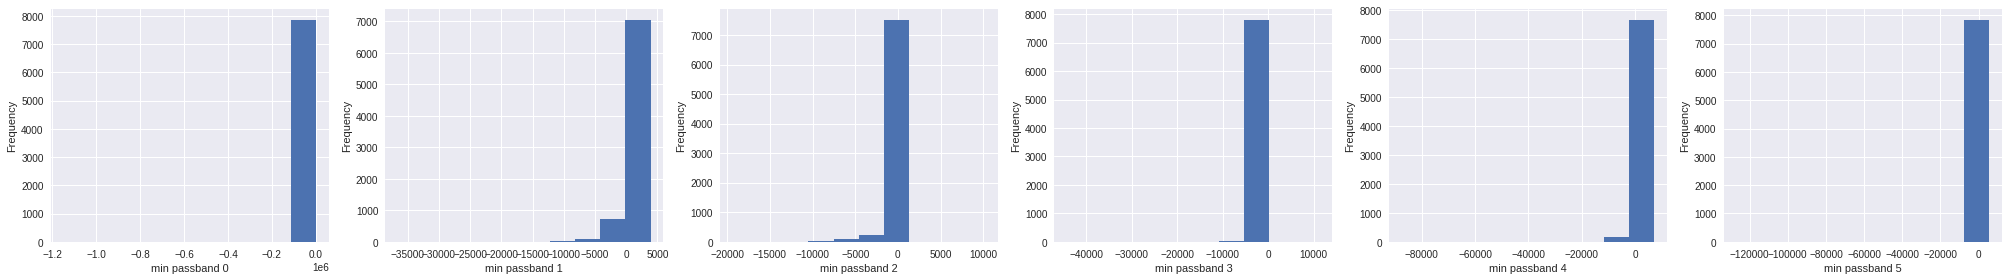

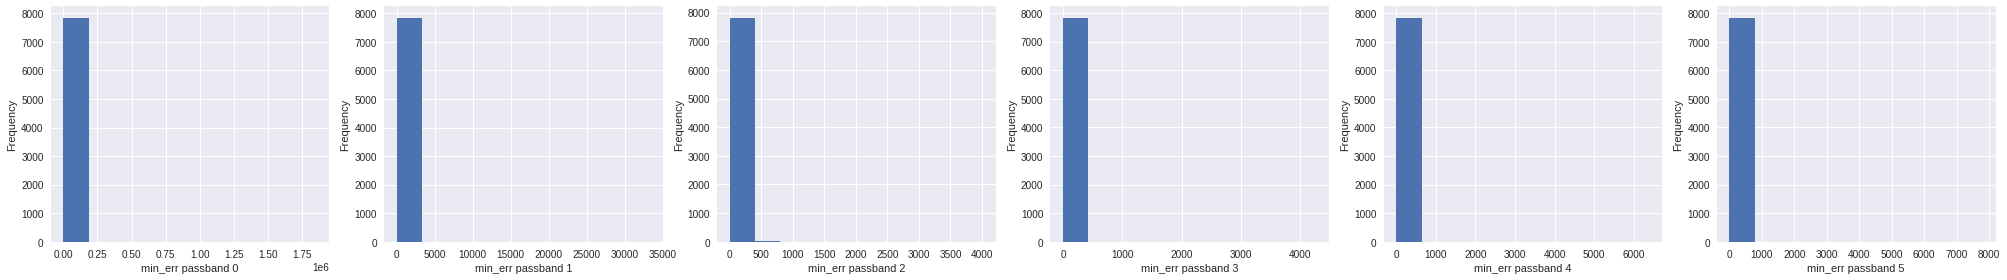

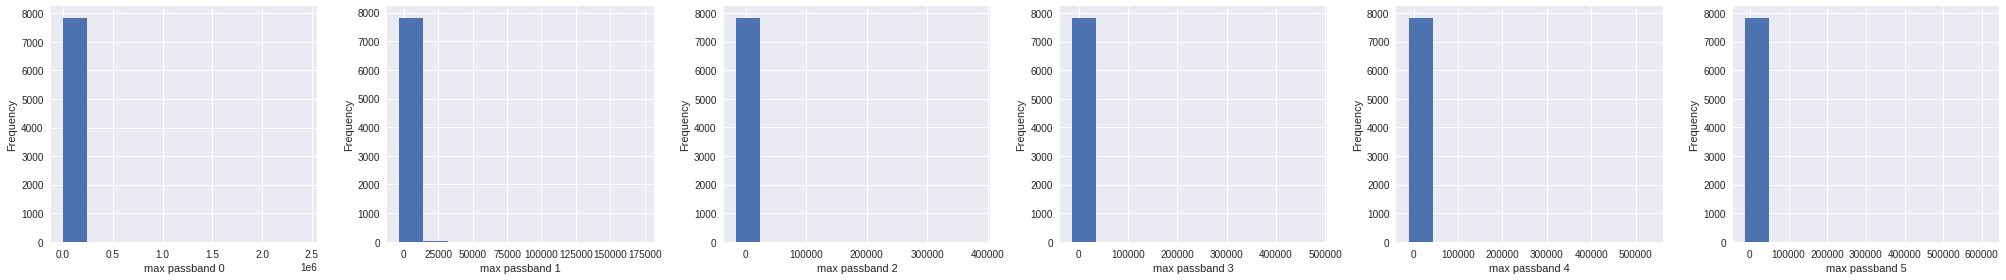

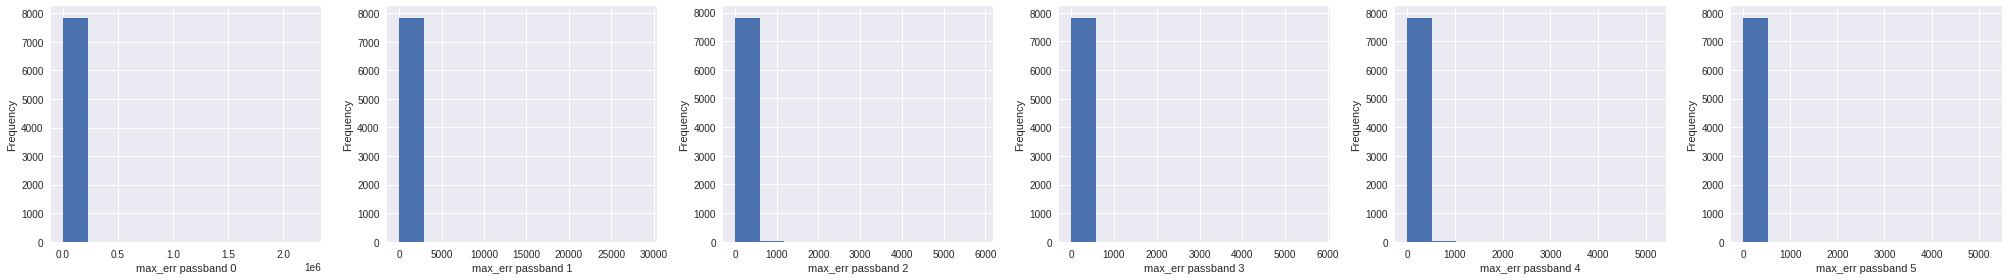

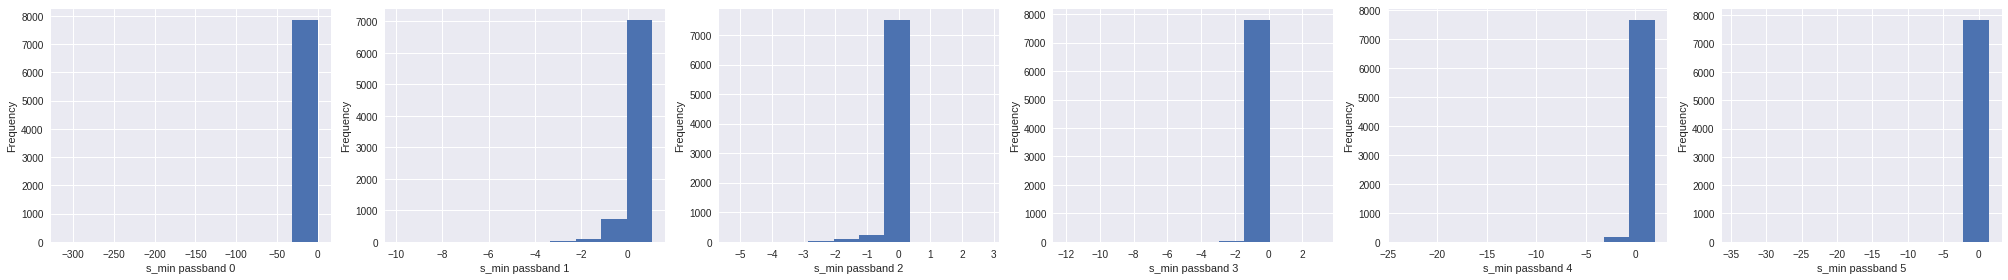

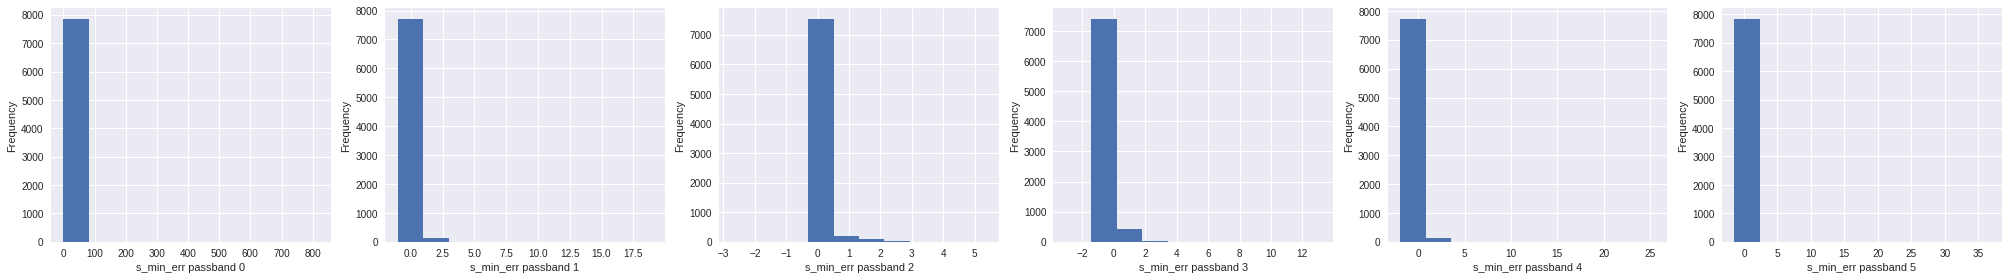

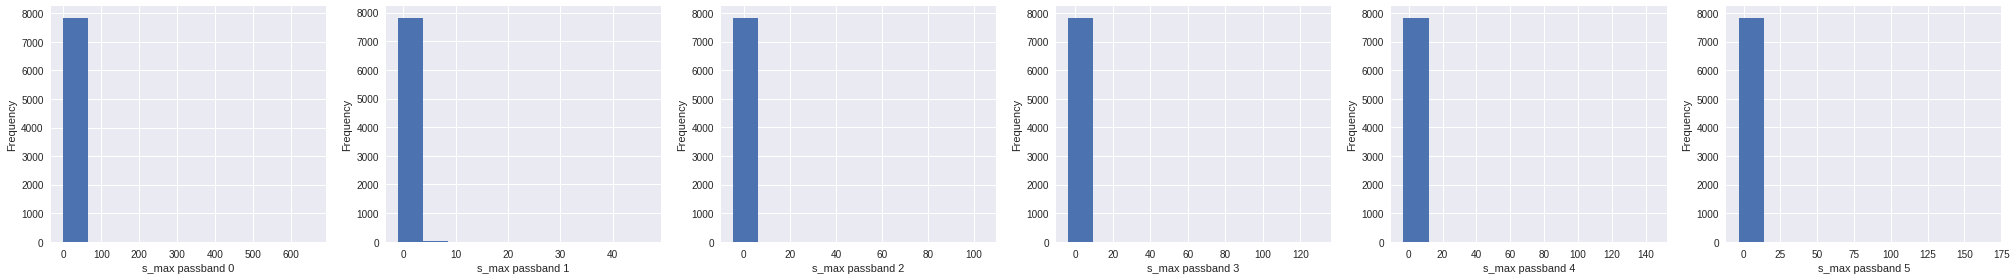

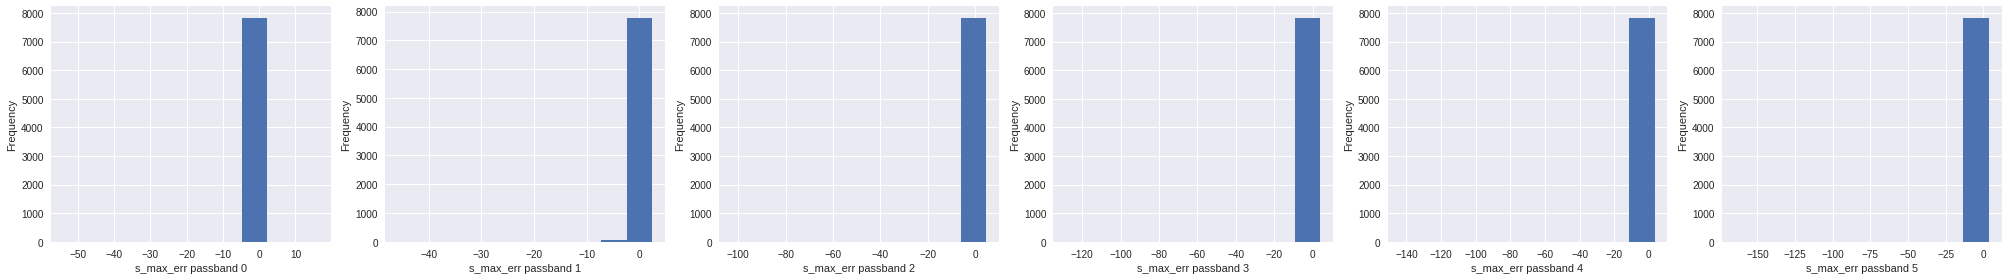

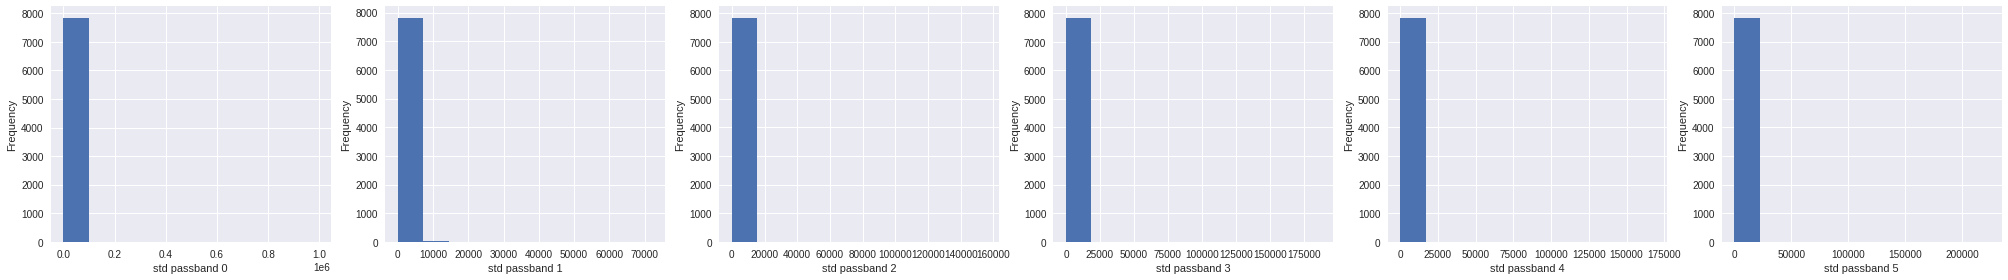

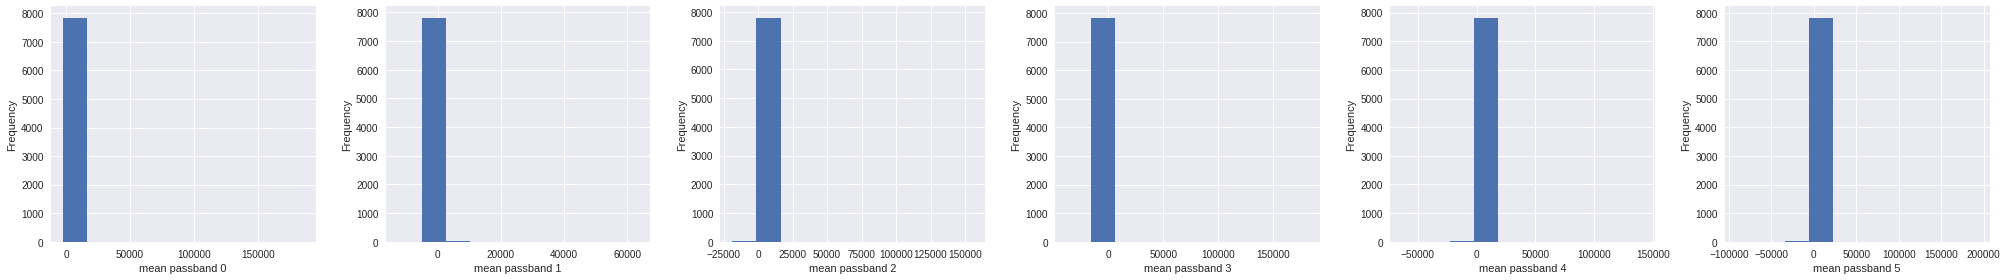

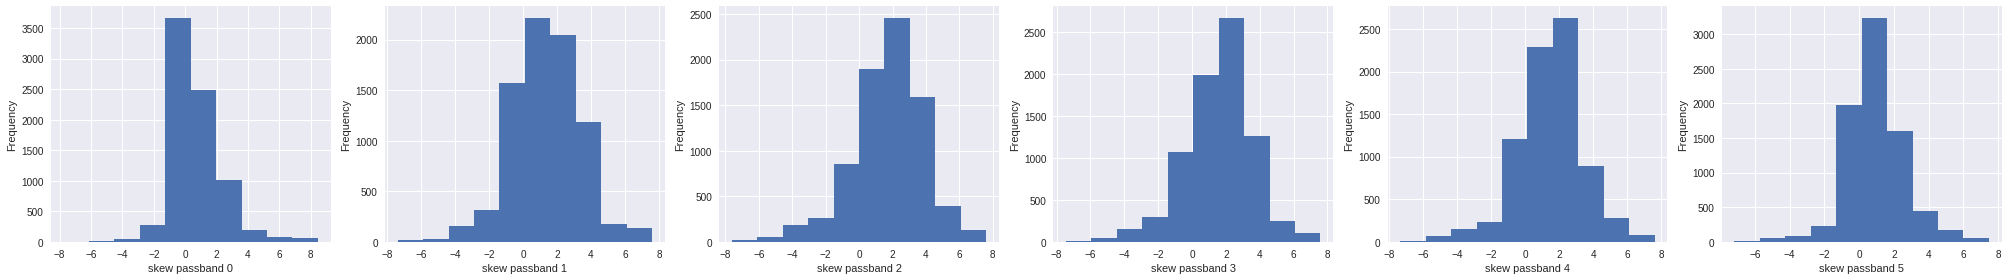

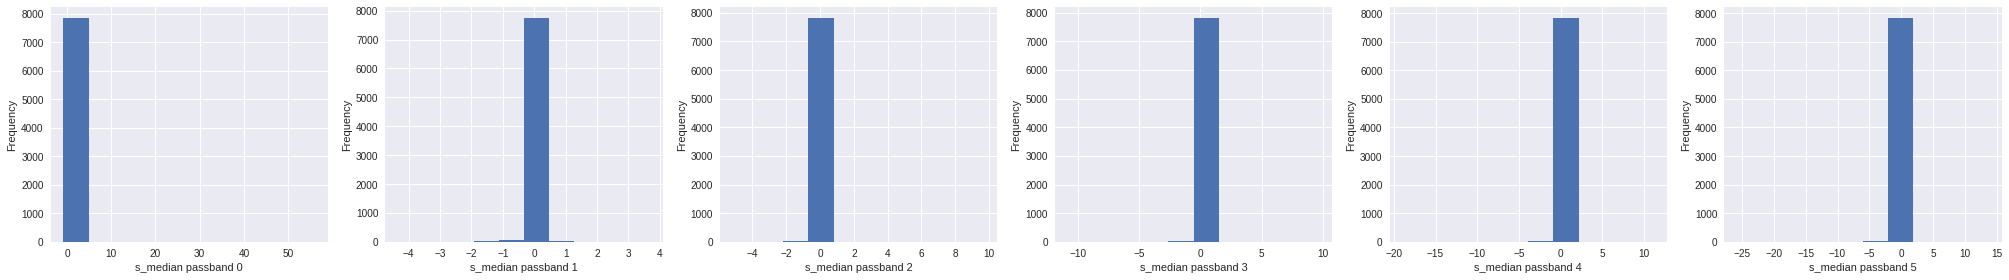

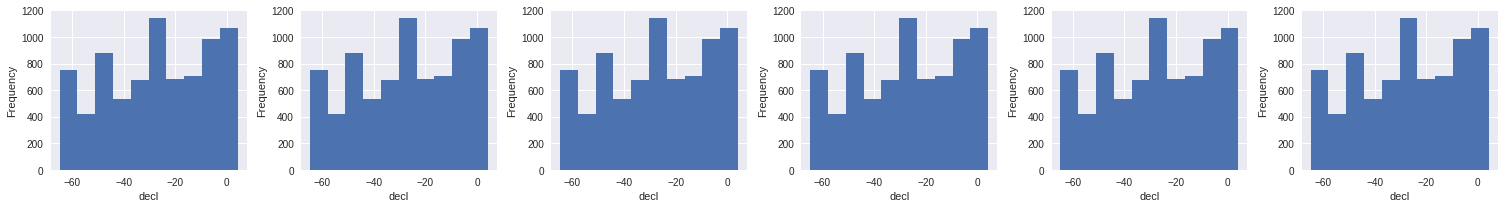

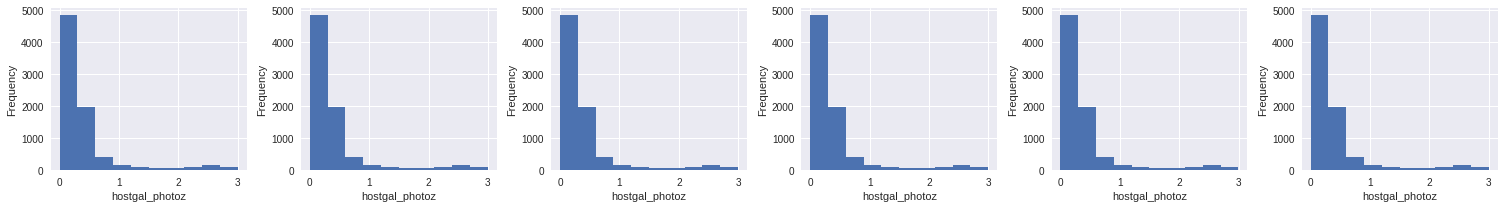

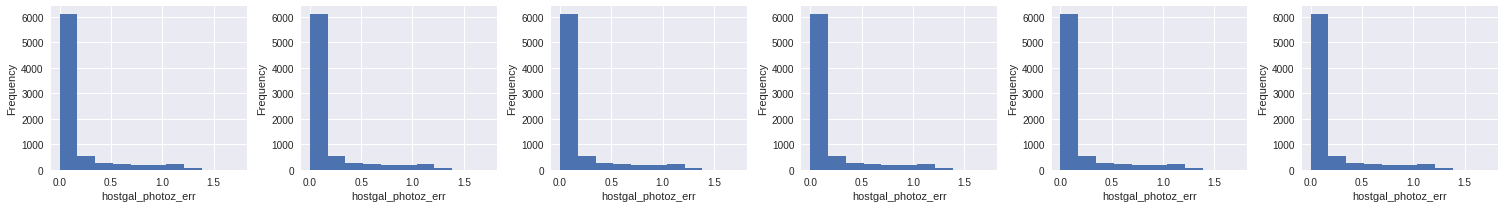

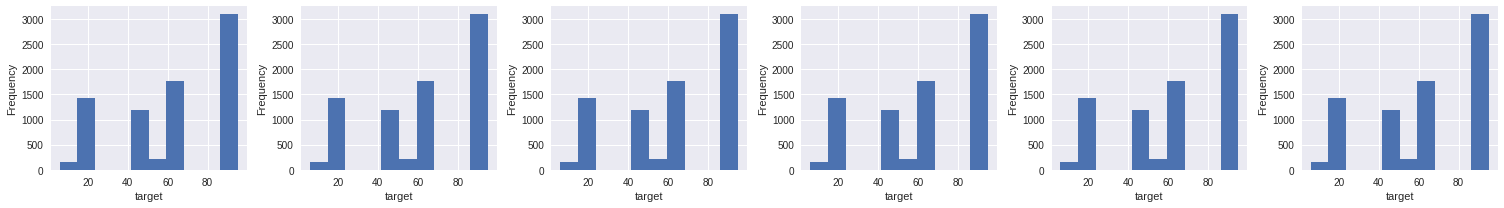

In [ ]:
for feat in currfeat:
  fig, ax = subplots(1, 6, figsize=(28, 4))
  
  for i in range(6):
    ax[i].hist(features[(feat, i)])
    ax[i].set_xlabel(feat + " passband " + str(i))
    ax[i].set_ylabel('Frequency')
  fig.tight_layout()

for col in cols: 
  fig, ax = subplots(1, 6, figsize=(21, 3))
  
  for i in range(6):
    ax[i].hist(features[col])
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')
  fig.tight_layout()

Fig. 4: Histograms for all columns in feature extraction dataframe. A few highlights: 

- Check out that normal-ish distribution on skew across most of the passbands! 
- Looks like WFD survey is a bit more represented than DDF
- Kind of hard to glean much from the means and min/maxes at these bin sizes, but worried about overdetermining with bins. 

<font color="red">FBB ok</font>


In [ ]:
print("My feature space is {} features (columns)".format(features.shape[1]))

My feature space is 76 features (columns)


# TASK III : Gaussian Processes

So a lot of this was just copying code in the GP demo notebook and maybe understanding 50% of what I was doing. I regularly found myself getting the error message "\[x]th leading minor of the array is not positive definite" on different object, which enters into some linear algebra territory that frankly is way, way over my head. 

In [ ]:
# randomly selecting time series but also picking different target types
# but seeding this because otherwise none of my captions make sense when reproduced
np.random.seed(443)
targets = metadata['target'].unique()
choices = np.random.choice(targets, 10, replace = False)

ids = []
print('Objects Selected:')
for choice in choices: 
  feats = features[features['target'] == choice]
  idx = np.random.choice(feats.index)
  ids.append(idx)
  print('Object {0} (Target type {1})'.format(idx, choice))

Objects Selected:
Object 24408486 (Target type 53)
Object 102337497 (Target type 90)
Object 82324933 (Target type 88)
Object 20280451 (Target type 67)
Object 92364022 (Target type 16)
Object 127145862 (Target type 65)
Object 12552058 (Target type 62)
Object 84924545 (Target type 95)
Object 34413965 (Target type 52)
Object 16452890 (Target type 64)


In [ ]:
# abstracted this out to make debugging the actual model bit easier but probably gave myself more headaches by doing that
def plot_model(fig, ax, a, b, t, time_pred, y, pred, pred_var, yerr, id, arr):
  
  ax[a][b].set_title('Object {0}, Passband {1}'.format(id, arr))
  
  ax[a][b].fill_between(time_pred.ravel(), pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color="k", alpha=0.2)
  ax[a][b].plot(time_pred.ravel(), pred, "magenta", lw=1.5, alpha=0.5)
  ax[a][b].errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
  ax[a][b].set_xlabel("Time (MJD)")
  ax[a][b].set_ylabel("Flux (Standardized");

  
def makeGP_opt1(id): 
  fig, ax = plt.subplots(2, 3, figsize=(20, 9), linewidth=10, edgecolor="#04253a")
  df = lcvs_s[lcvs_s['object_id'] == id]
  params1 = []
  params2 = []
  for band in bands:
    if band < 3:
      a = 0
      b = band
    else:
      a = 1
      b = band - 3 
    try:
      new_df = df[df['passband'] == band]
      y = new_df['flux']
      yerr = new_df['flux_err']
      t = new_df['mjd']  
      # These parameters mostly seem good bc the mimimize function breaks slightly less, but I don't know why that's the case
      kernel = np.var(y) * kernels.Product(kernels.ExpSquaredKernel(.25), kernels.CosineKernel(2))
      gp = george.GP(kernel)
      
      gp.compute(t, yerr) 

      def neg_ln_like(p):
          gp.set_parameter_vector(p)
          return -gp.log_likelihood(y)

      def grad_neg_ln_like(p):
          gp.set_parameter_vector(p)
          return -gp.grad_log_likelihood(y)
          
      result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
      gp.set_parameter_vector(result.x)
      # print('minimization succeeded on object {0} band {1}'.format(id, band))
      # print(result)
      pvect = gp.get_parameter_vector()
      params1.append(pvect[0])
      params2.append(pvect[1])
      time_pred = np.atleast_2d(np.linspace(t.min(), t.max(), 100)).T
      pred, pred_var = gp.predict(y, time_pred, return_var=True)
      # print("Optimized parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
      # print("Optimized ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
      plot_model(fig, ax, a, b, t, time_pred, y, pred, pred_var, yerr, id, band)
    except LinAlgError:
      print('minimization failed on object {0} band {1}'.format(id, band))
      fig.delaxes(ax[a][b])
    except ValueError:
      print('minimization failed on object {0} band {1}'.format(id, band))
      fig.delaxes(ax[a][b])
  print('Variance of Optimization Params, Object {}: {:.2f} {:.2f}'.format(id, np.var(params1), np.var(params2)))
  fig.tight_layout()

Variance of Optimization Params, Object 24408486: 26.23 367.24
Variance of Optimization Params, Object 102337497: 0.66 135.54
Variance of Optimization Params, Object 82324933: 37.04 21.66
Variance of Optimization Params, Object 20280451: 0.53 100.32
Variance of Optimization Params, Object 92364022: 0.37 227.30
Variance of Optimization Params, Object 127145862: 0.21 65.68
Variance of Optimization Params, Object 12552058: 0.74 87.87
Variance of Optimization Params, Object 84924545: 0.08 102.03
Variance of Optimization Params, Object 34413965: 0.25 237.77
Variance of Optimization Params, Object 16452890: 38.89 281.57


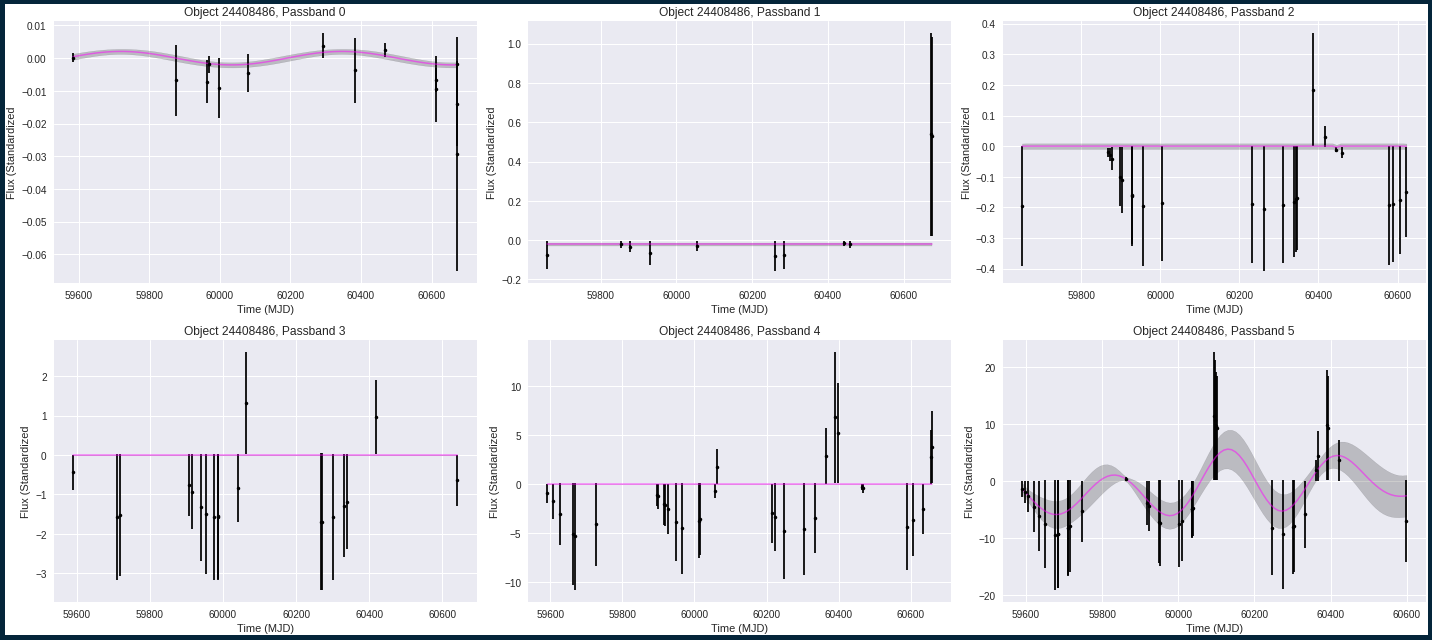

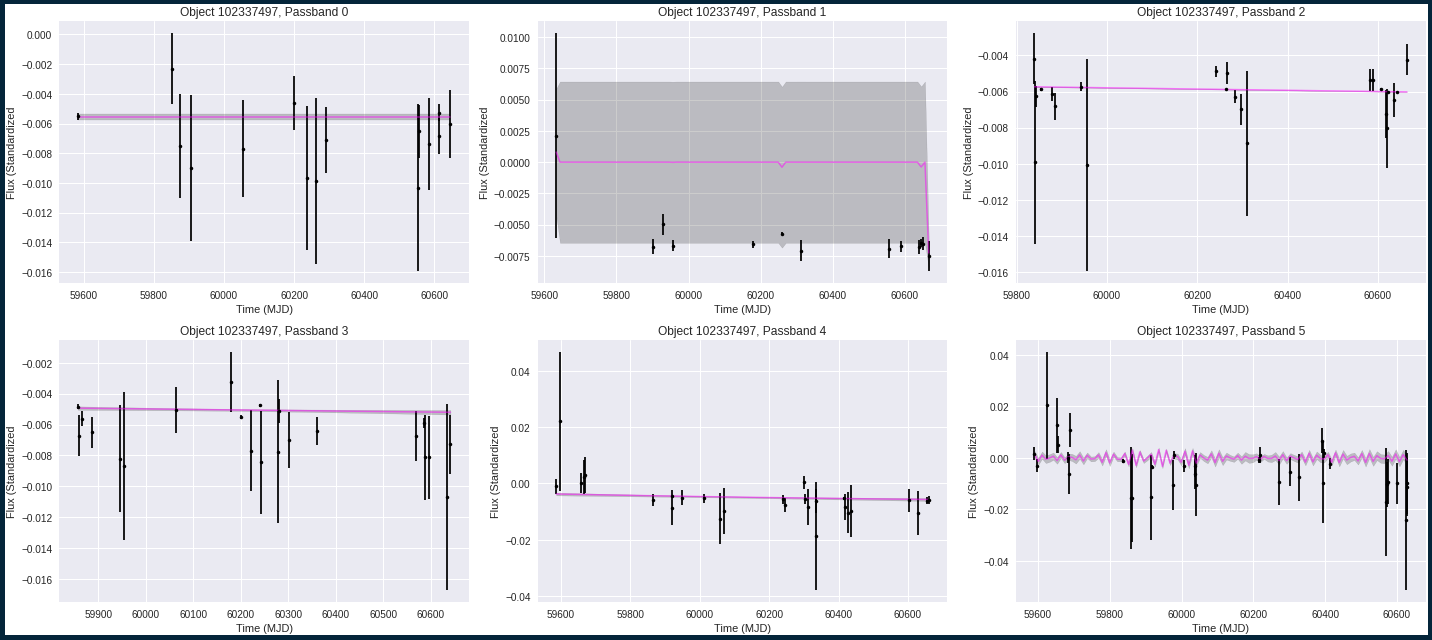

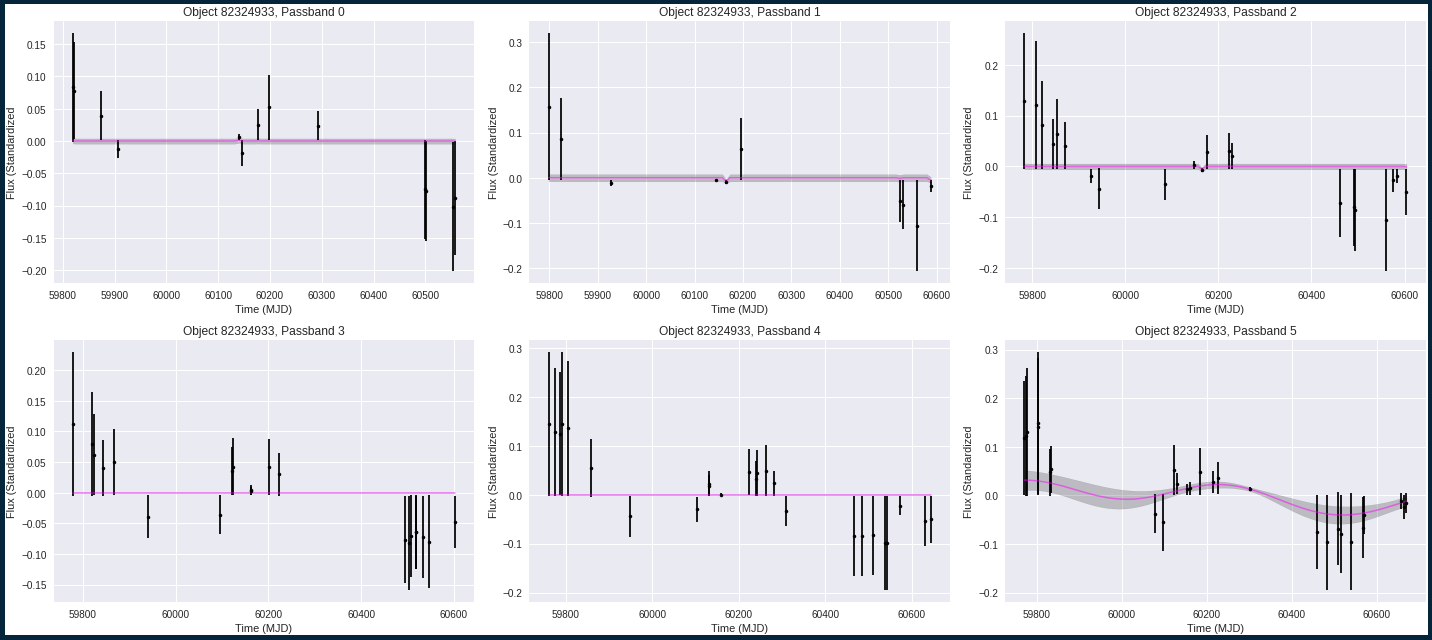

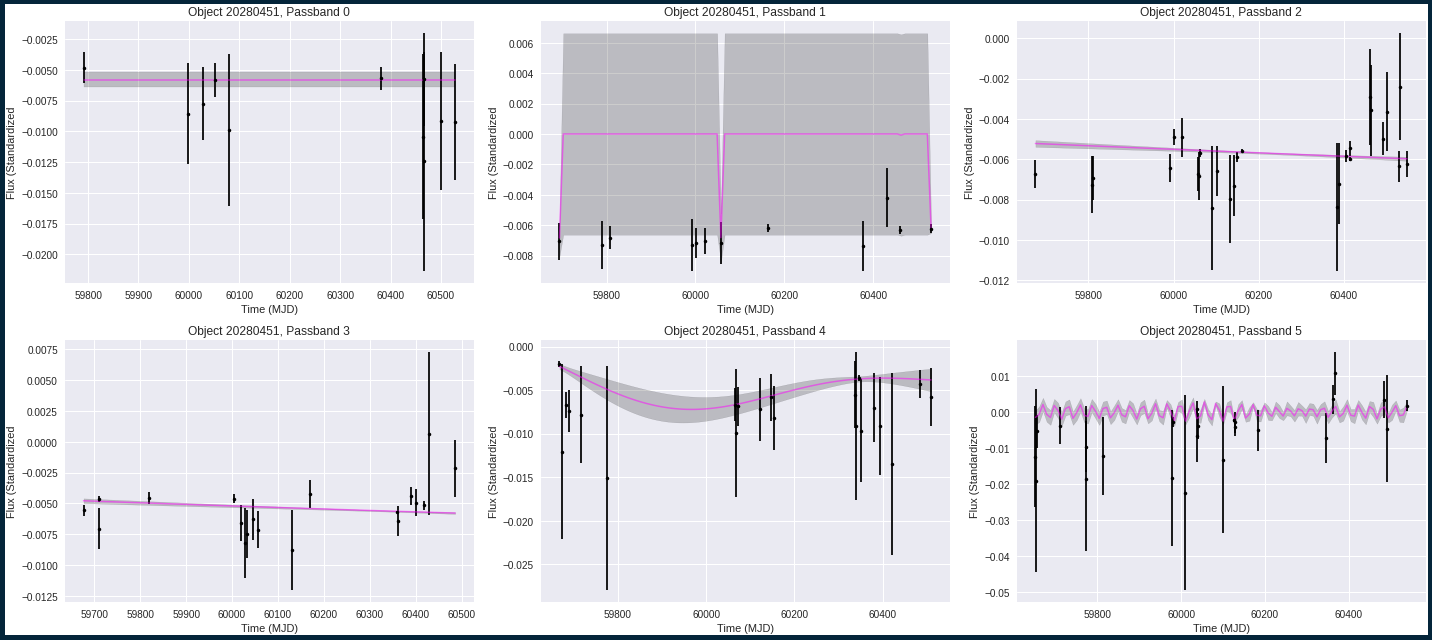

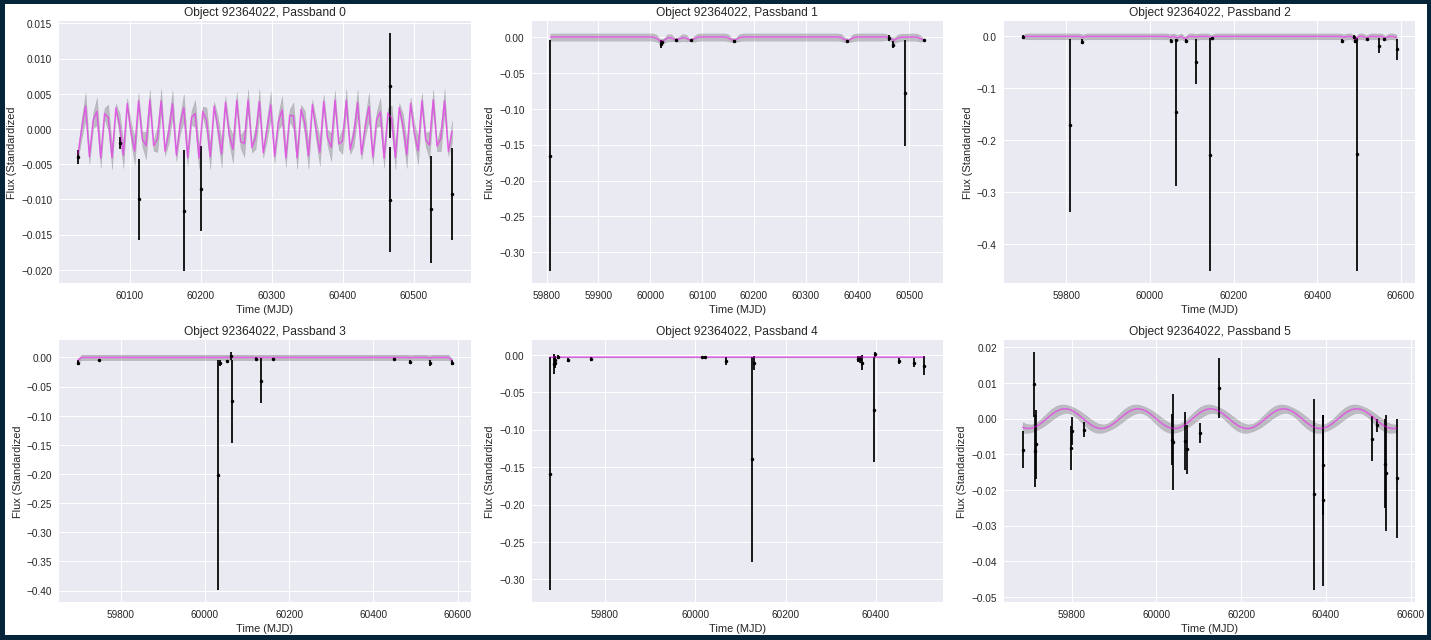

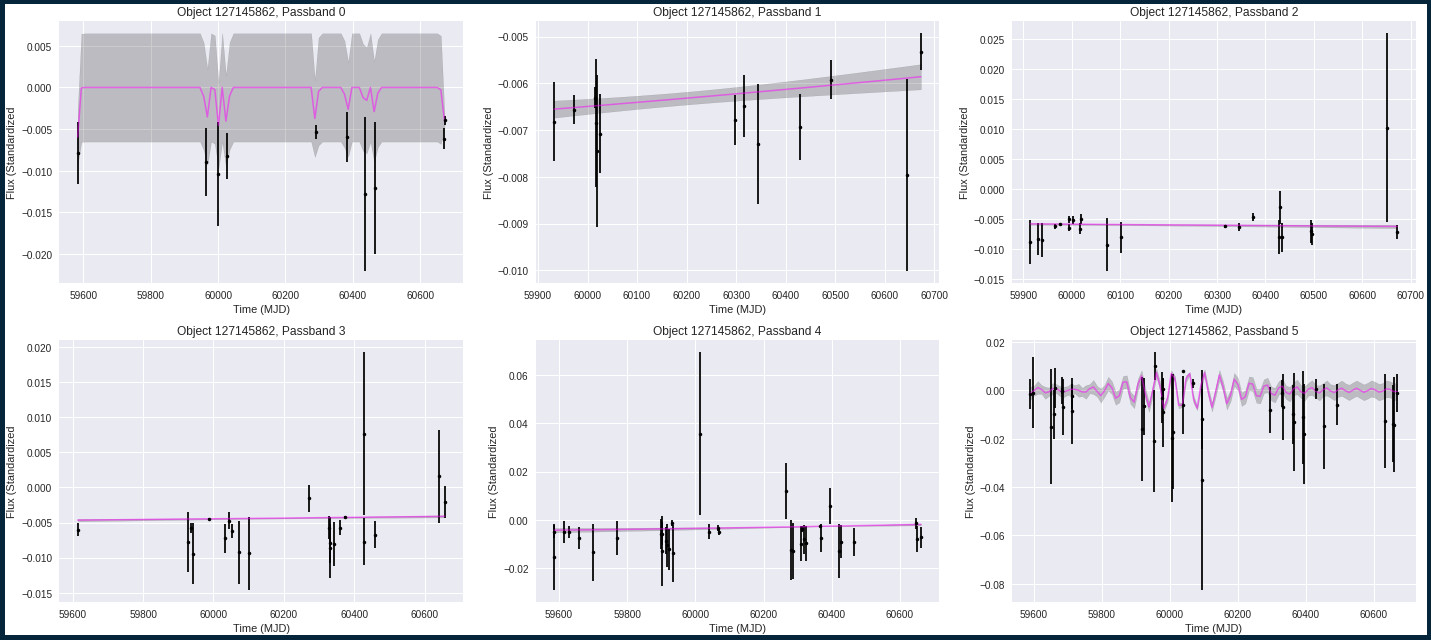

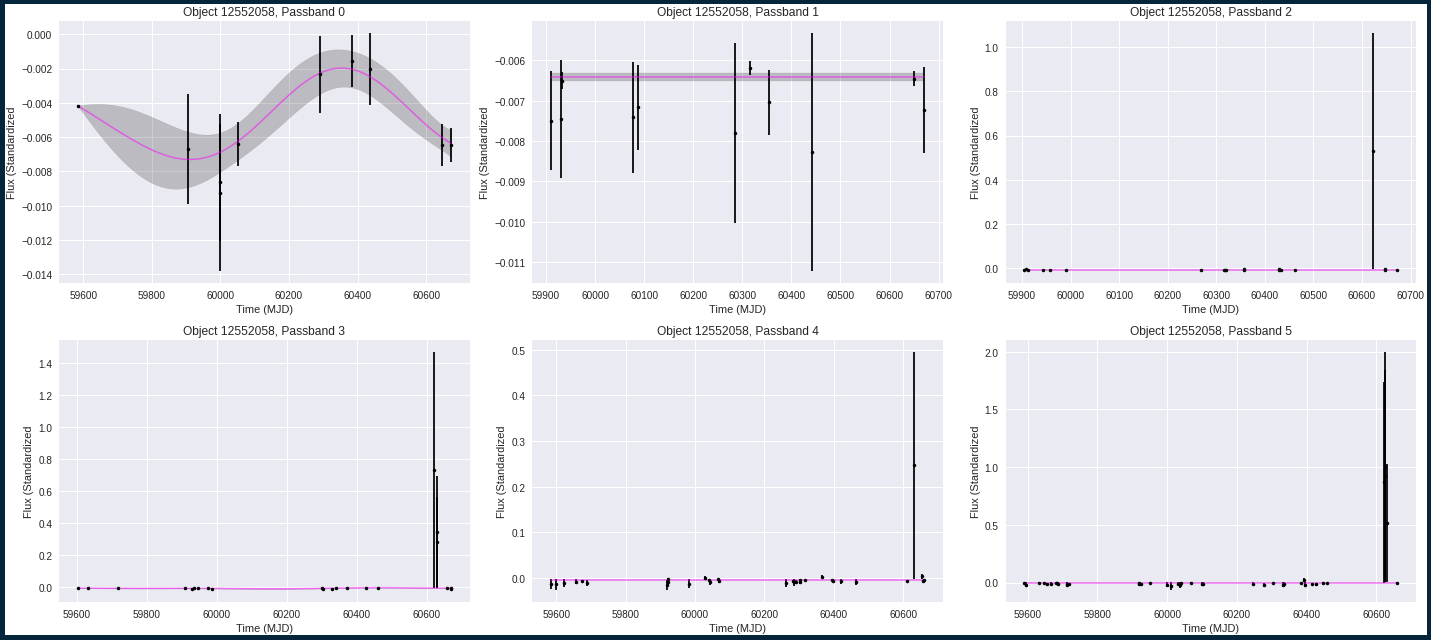

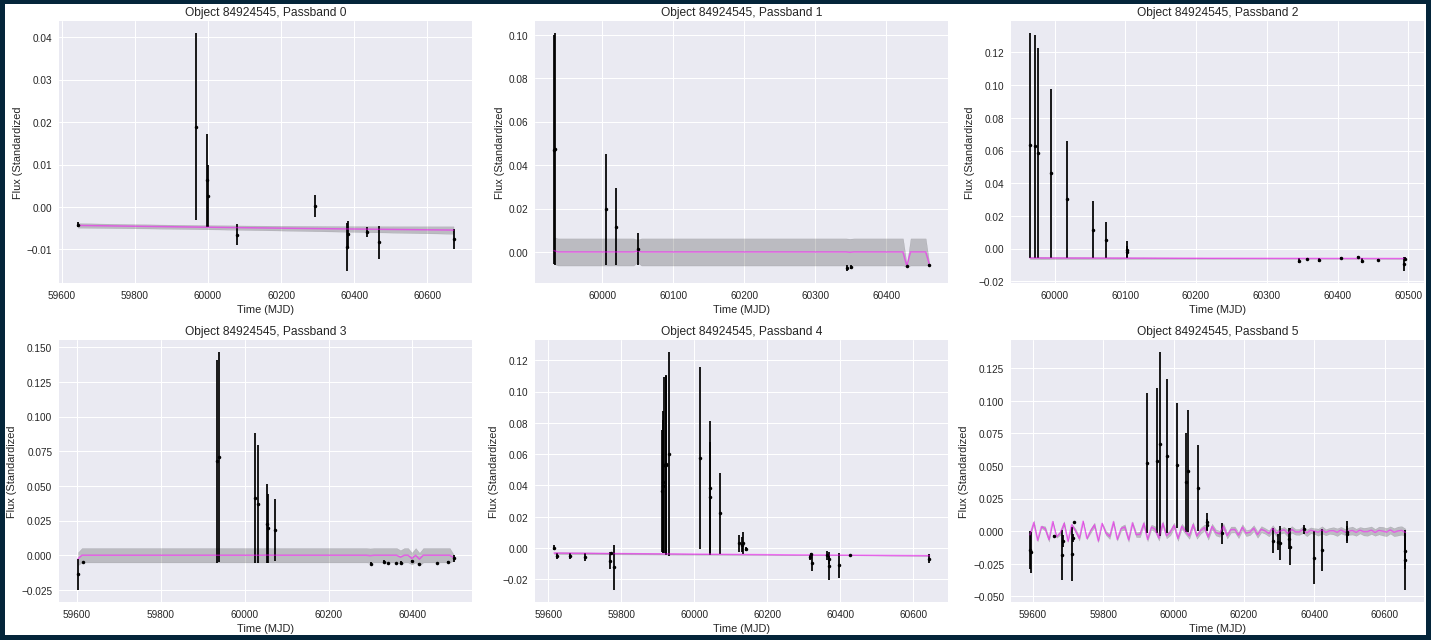

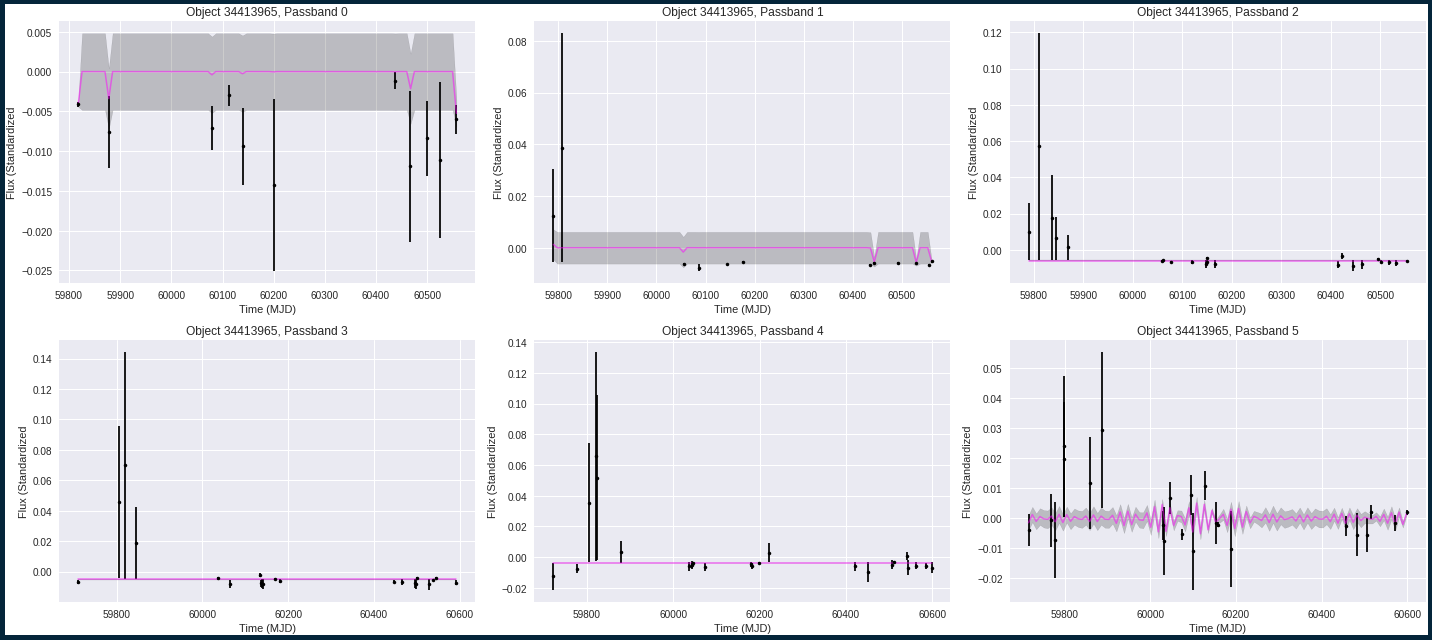

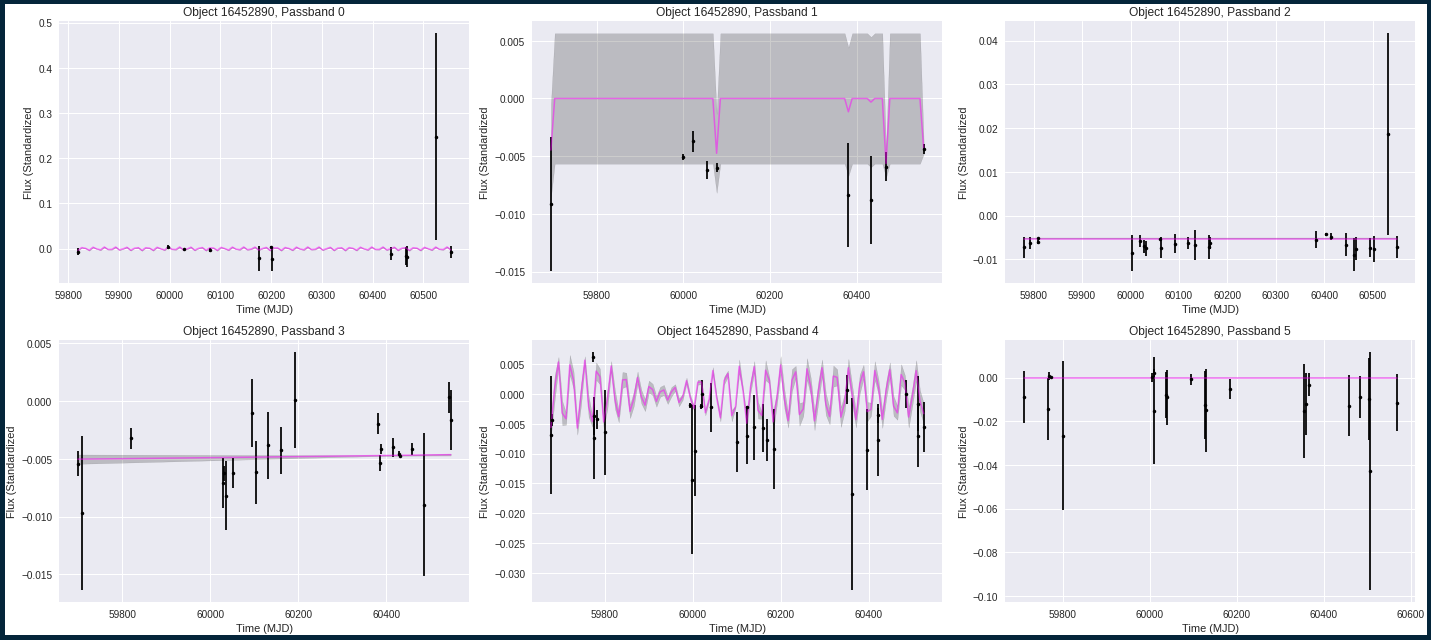

In [ ]:
for i in ids:
  makeGP_opt1(i)

Fig. 5: 10 randomly selected astronomical objects representing different target categories, with a Gaussian proccess applied to each band (with exceptions where "not positive defined" errors came up; these errors are printed above the plots, along with the variance of the GP parameters. 

Honestly, I only kind of understand what's going on here--some objects and bands seem to be fit  (Object 12552058, band 0 is maybe the least batshit one) but a lot of it feels like noise. 

The variance of the optimization parameters created by the minimization function (printed above, but also including here) seems pretty bad! These are super inconsistent imputations.

*   Variance of Optimization Params, Object 24408486: 26.23 367.24
*   Variance of Optimization Params, Object 102337497: 0.66 135.54
*   Variance of Optimization Params, Object 82324933: 37.04 21.66
*   Variance of Optimization Params, Object 20280451: 0.53 100.32
*   Variance of Optimization Params, Object 92364022: 0.37 227.30
*   Variance of Optimization Params, Object 127145862: 0.21 65.68
*   Variance of Optimization Params, Object 12552058: 0.74 87.87
*   Variance of Optimization Params, Object 84924545: 0.08 102.03
*   Variance of Optimization Params, Object 34413965: 0.25 237.77
*   Variance of Optimization Params, Object 16452890: 38.89 281.57


<font color="red">FBB fair - but look at the last row: that is the same object at 3 different frequencies, but one of them is clearly periodic theothr onesare not- that is farily hard to believe no? and look at how many of the models actually really do not go through the data at all, even when there are sets of datapoints that are consecutive and have similar values</font>


In [ ]:
# the cleverer thing would have been to make the function take different gp.compute params, but I'm past the point where refactoing makes sense
def makeGP_opt2(id): 
  fig, ax = plt.subplots(2, 3, figsize=(20, 9), linewidth=10, edgecolor="#04253a")
  df = lcvs_s[lcvs_s['object_id'] == id]
  params1 = []
  params2 = []
  for band in bands:
    if band < 3:
      a = 0
      b = band
    else:
      a = 1
      b = band - 3 
    try:
      new_df = df[df['passband'] == band]
      y = new_df['flux']
      yerr = new_df['flux_err']
      t = new_df['mjd']  
      # These parameters mostly seem good bc the mimimize function breaks slightly less, but I don't know why that's the case
      kernel = np.var(y) * kernels.Product(kernels.ExpSquaredKernel(.25), kernels.CosineKernel(2))
      gp = george.GP(kernel)
      
      gp.compute(t, 0.1*np.abs(y)) 

      def neg_ln_like(p):
          gp.set_parameter_vector(p)
          return -gp.log_likelihood(y)

      def grad_neg_ln_like(p):
          gp.set_parameter_vector(p)
          return -gp.grad_log_likelihood(y)
          
      result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
      gp.set_parameter_vector(result.x)
      # print('minimization succeeded on object {0} band {1}'.format(id, band))
      # print(result)
      pvect = gp.get_parameter_vector()
      params1.append(pvect[0])
      params2.append(pvect[1])
      time_pred = np.atleast_2d(np.linspace(t.min(), t.max(), 100)).T
      pred, pred_var = gp.predict(y, time_pred, return_var=True)
      # print("Optimized parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
      # print("Optimized ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
      plot_model(fig, ax, a, b, t, time_pred, y, pred, pred_var, yerr, id, band)
    except LinAlgError:
      print('minimization failed on object {0} band {1}'.format(id, band))
      fig.delaxes(ax[a][b])
    except ValueError:
      print('minimization failed on object {0} band {1}'.format(id, band))
      fig.delaxes(ax[a][b])
  print('Variance of Optimization Params, Object {}: {:.2f} {:.2f}'.format(id, np.var(params1), np.var(params2)))
  fig.tight_layout()

Variance of Optimization Params, Object 24408486: 19.58 13.27
Variance of Optimization Params, Object 102337497: 0.15 19.16
Variance of Optimization Params, Object 82324933: 0.03 13.00
Variance of Optimization Params, Object 20280451: 0.21 9.76
Variance of Optimization Params, Object 92364022: 3.16 7.84
Variance of Optimization Params, Object 127145862: 0.20 44.52
Variance of Optimization Params, Object 12552058: 7.54 168.93
Variance of Optimization Params, Object 84924545: 0.82 12.81
Variance of Optimization Params, Object 34413965: 0.29 7.46
Variance of Optimization Params, Object 16452890: 3.13 10.23


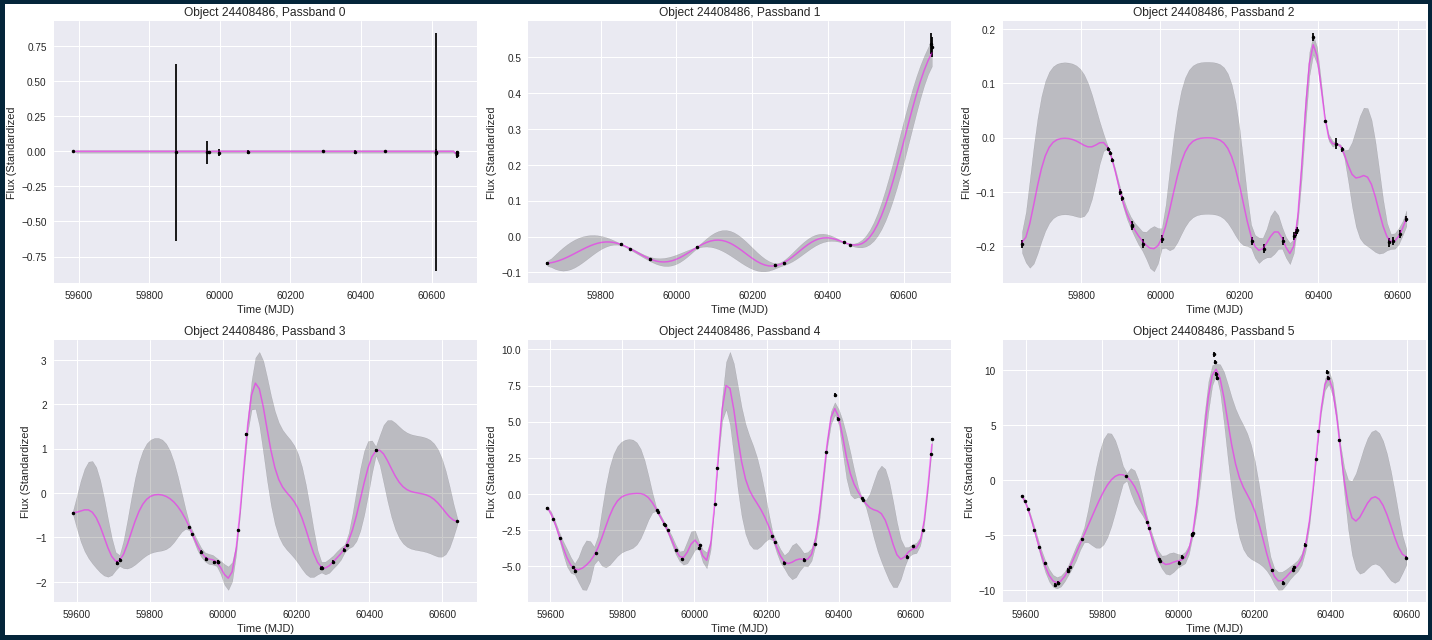

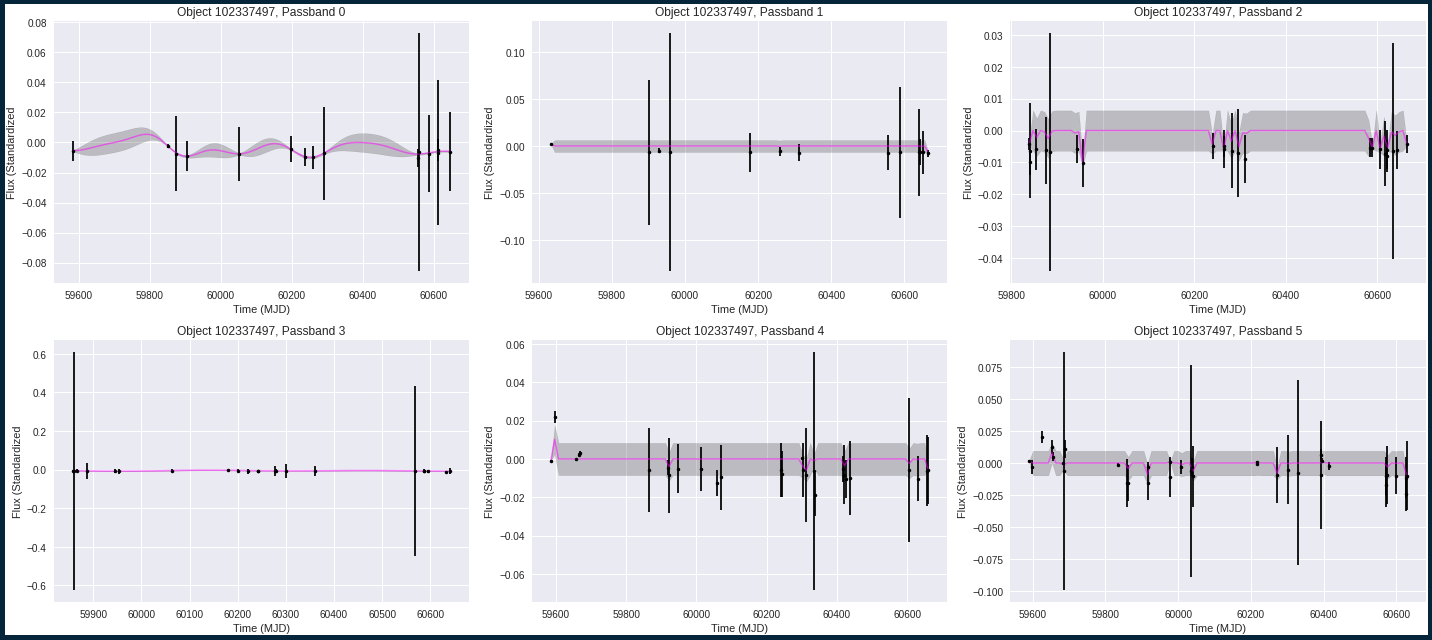

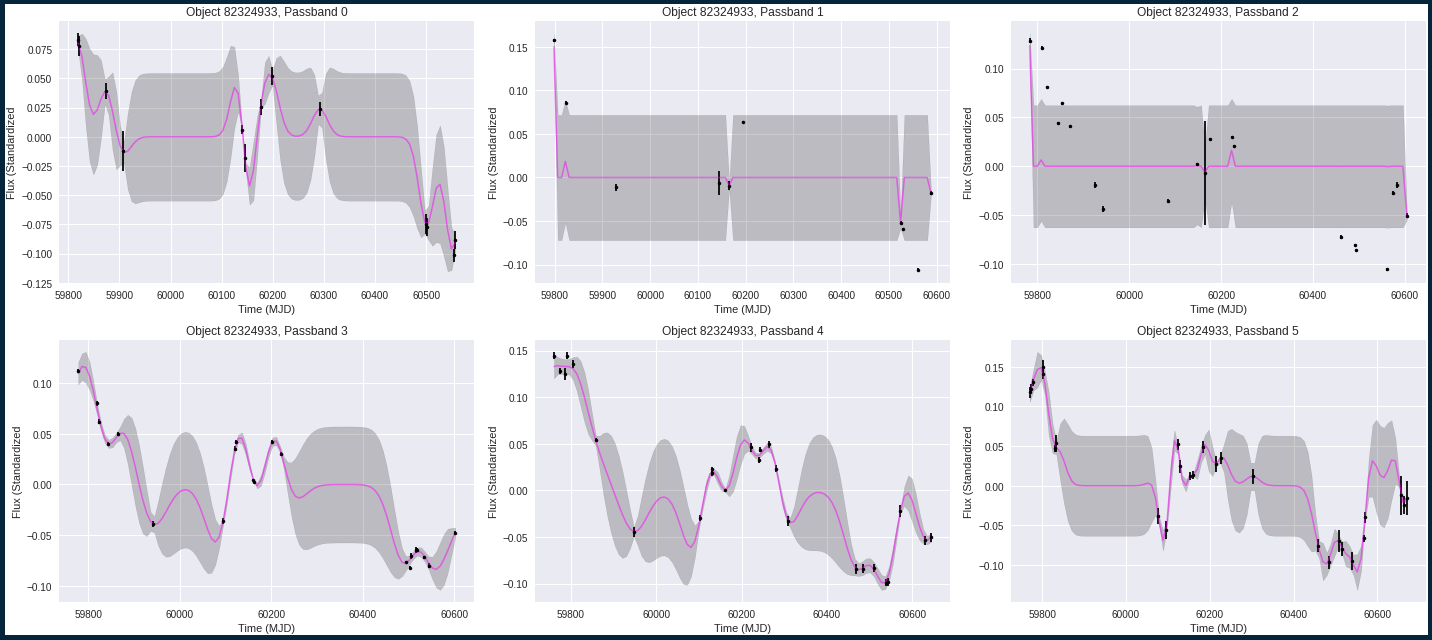

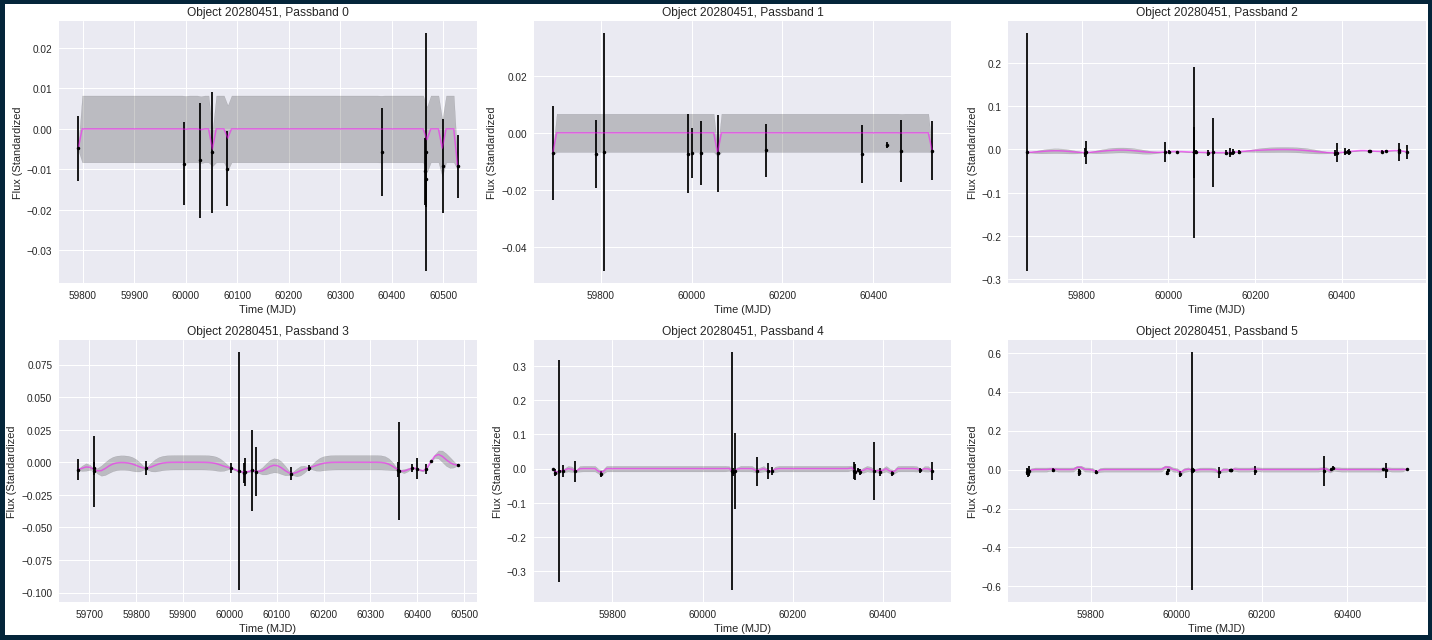

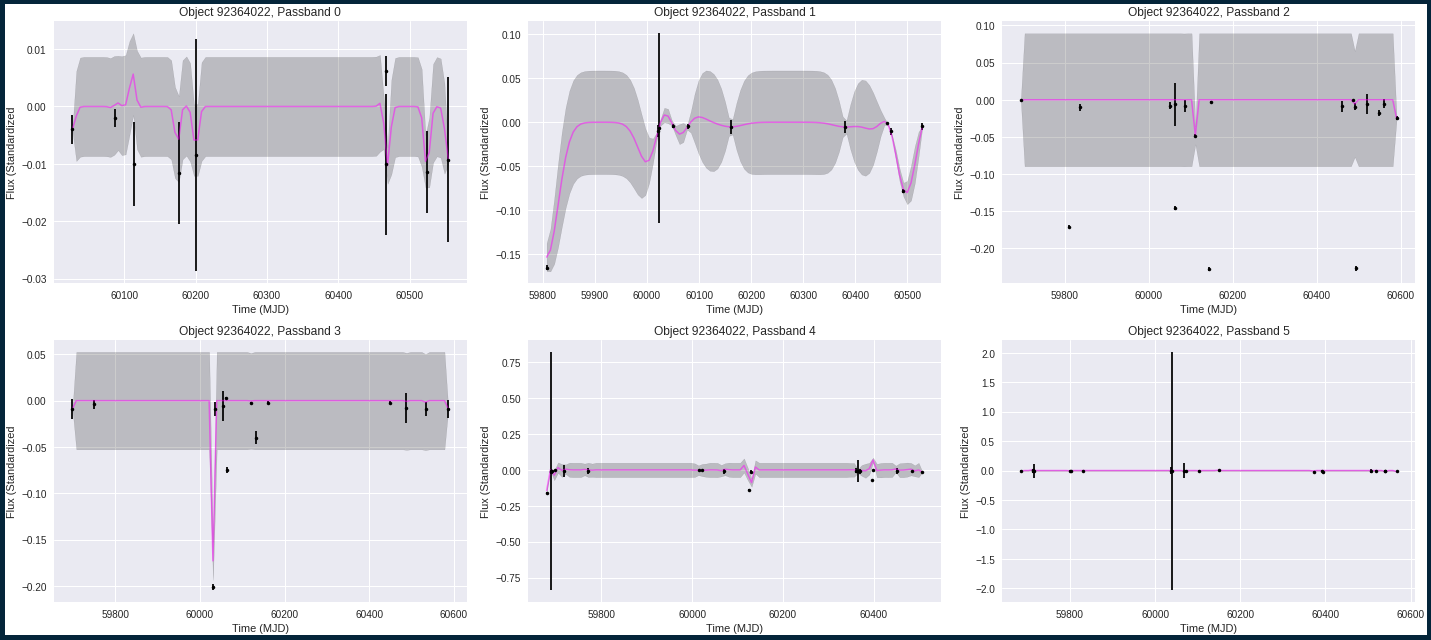

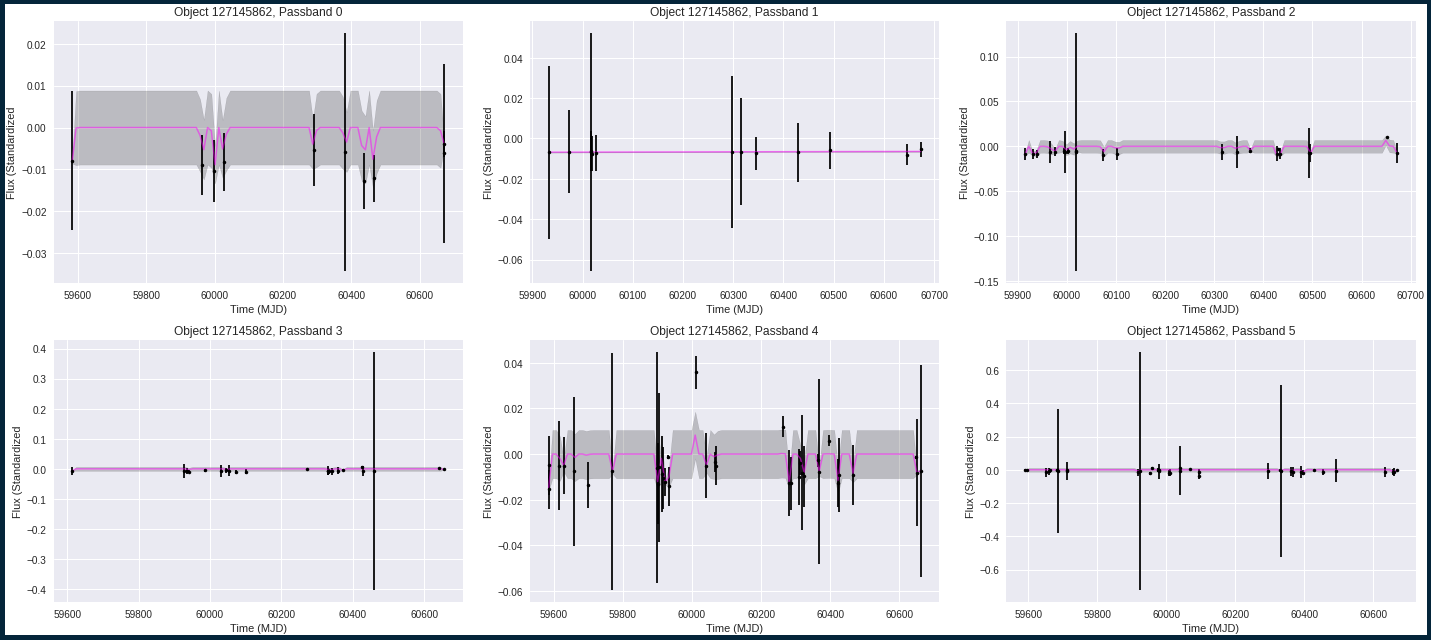

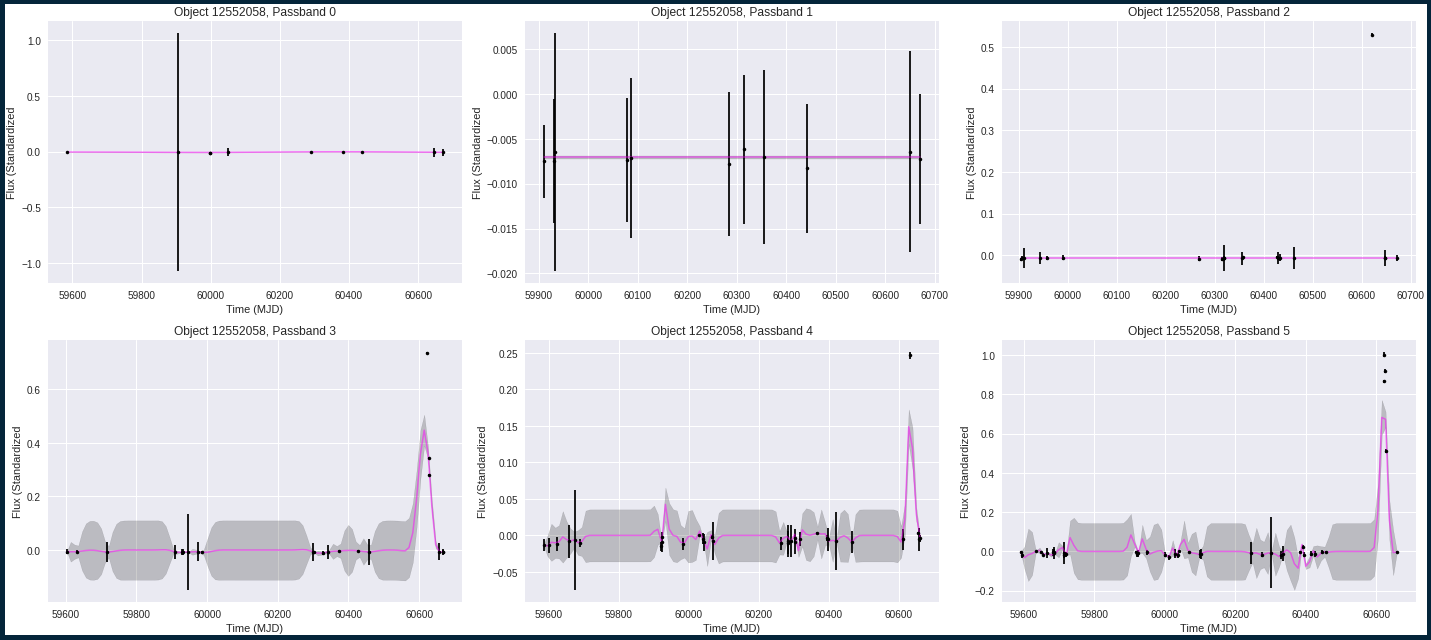

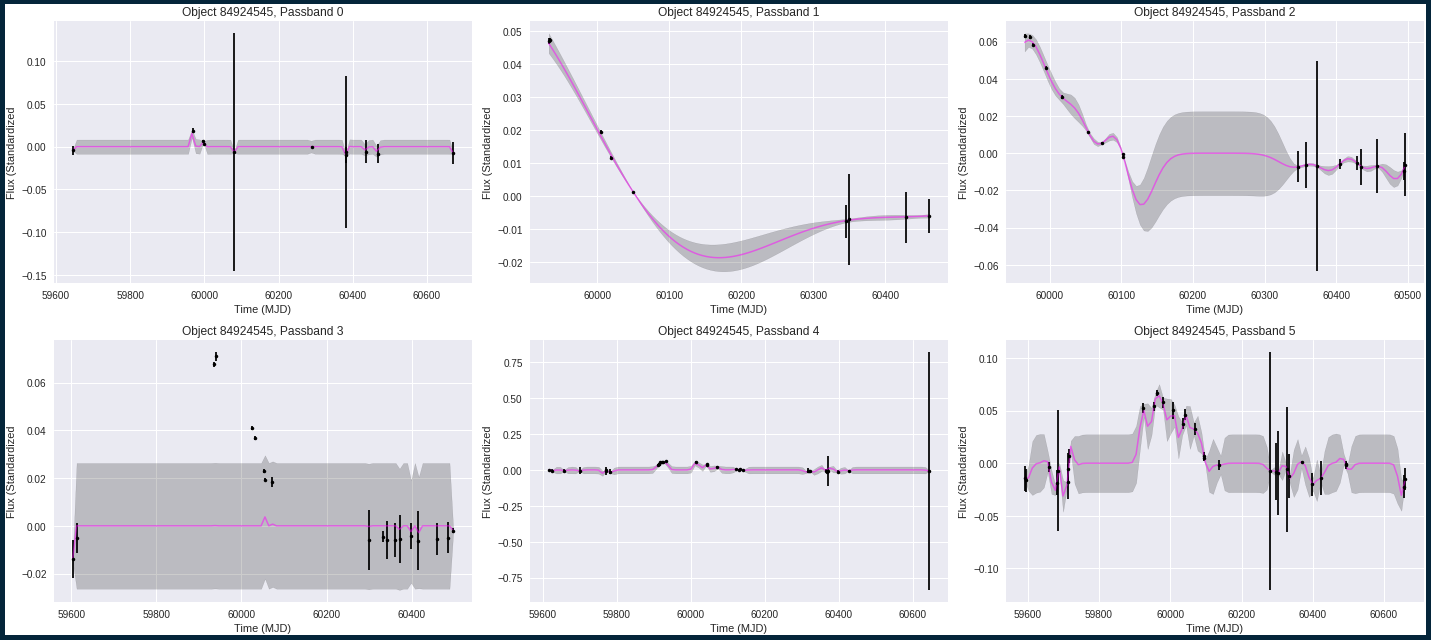

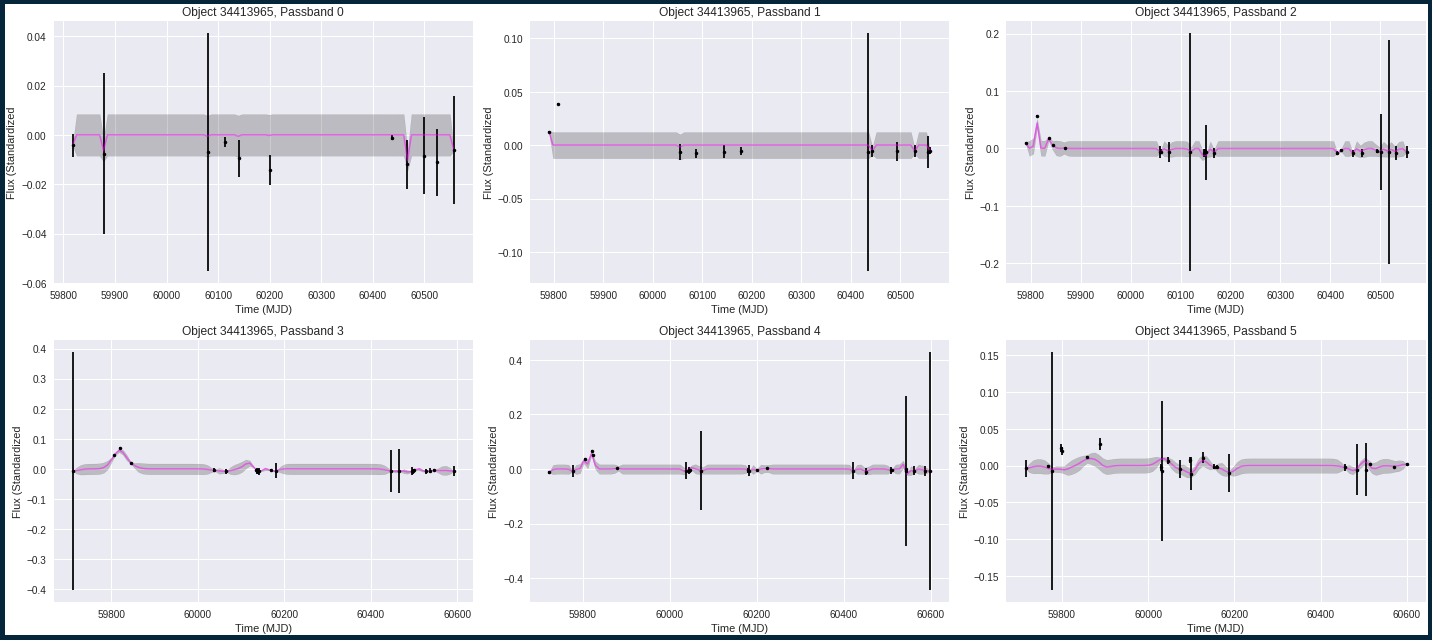

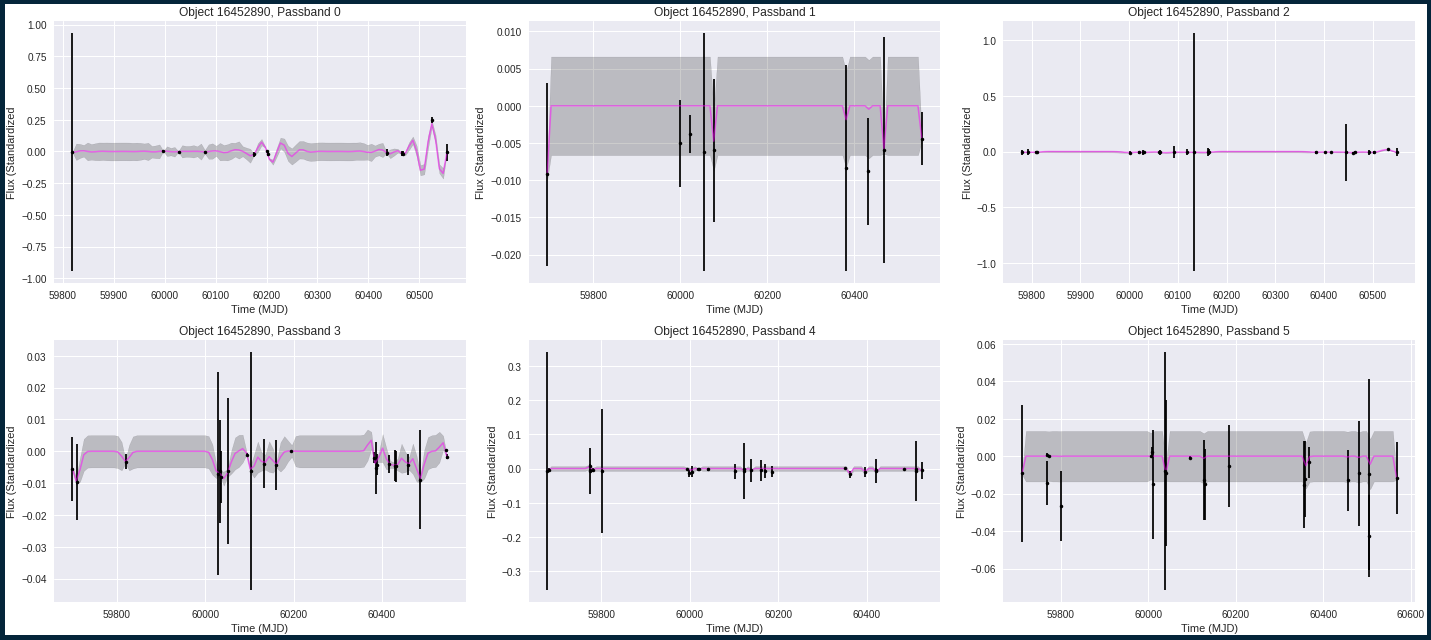

In [ ]:
for i in ids: 
  makeGP_opt2(i)

Fig. 6. The same 10 astronomical objects subjected to Gaussian process, by band, only this time with 10% the absolute value of flux as the error value instead of `flux_err`. So this is definitely a different kind of mess compared to Figure 5, lots more wacky shaping of the error range (Object 92364022 band 1 and most of the bands for Object 82324933 are fun examples of this). It makes sense that an error range that's more uniformly distributed around the actual data instead of the more inconsistent actual flux errors would fit more tightly to the data, I suppose? But I still have no idea how to use any of these or improve them. 

The variance for the 10% absolute of flux (printed above, but also including here) is generally lower than the variance from the process used in Figure 5; there's still some pretty huge variance results (e.g. 12552058) but while the plots here are much more visually chaotic, the variance results are a little less so. 

*   Variance of Optimization Params, Object 24408486: 19.58 13.27
*   Variance of Optimization Params, Object 102337497: 0.15 19.16
*   Variance of Optimization Params, Object 82324933: 0.03 13.00
*   Variance of Optimization Params, Object 20280451: 0.21 9.76
*   Variance of Optimization Params, Object 92364022: 3.16 7.84
*   Variance of Optimization Params, Object 127145862: 0.20 44.52
*   Variance of Optimization Params, Object 12552058: 7.54 168.93
*   Variance of Optimization Params, Object 84924545: 0.82 12.81
*   Variance of Optimization Params, Object 34413965: 0.29 7.46
*   Variance of Optimization Params, Object 16452890: 3.13 10.23



<font color="red">FBB good</font>
